# Hackathon 2021

## Project setup

In [1]:
!pip install folium

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from scipy import stats as st
import warnings
from pandas.io.json import json_normalize
# reading file
import os 
from pathlib import Path
import urllib
# data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
# map
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [3]:
%%html
<style>
table {float:left}
</style>

In [4]:
pd.set_option('display.max_columns', None)

## Matplotlib setup

In [5]:
%matplotlib inline
small, medium, large = 14, 16, 22
params = {'figure.figsize':   (14, 5),
          'figure.titlesize': medium,
          'legend.fontsize':  small,
          'axes.titlesize':   small,
          'axes.labelsize':   small,
          'xtick.labelsize':  small,
          'ytick.labelsize':  small,
          'legend.loc':       'best'}
plt.rcParams.update(params)

In [6]:
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.3f}'.format

# Project "Rare Disease"

## Description
More than 300 million people worldwide are believed to be infected with one or more of the 7,000 rare diseases reported. In Canada, a rare condition affects about 1 in 12 Canadians. The exact cause of many rare diseases is unknown. A key challenge faced is that small populations of patients can eventually lead to limited data and greater uncertainty about a disease's understanding. In order to optimize patient care, constant research is ongoing to improve healthcare knowledge of rare diseases. One area that could help improve the diagnosis and care of patients with rare diseases is leveraging patient registry data.

## Datasets description

### Genes
In order to better define rare disorders of genetic origin, Orphanet provides information on every
gene related to a rare disorder. This information includes the genetic international nomenclature,
the gene typology, the chromosomal location, the cross-mappings with other international genetic
databases. Orphanet also defines the relationship between genes and their related rare disorders
and provides the evidence for establishing these gene-disorder relationships.
The relationship between a gene and a disease is qualified according to the role that the gene plays in the pathogenesis of a disease. Genes are annotated as causative (from germline or somatic mutations), modifiers, major susceptibility factors or playing a role in the phenotype (for chromosomal anomalies). Candidate genes o r b i o m a r k e r s are included if a genetic test exists in the clinical setting.

### Phenotypes 
The Orphanet inventory of rare diseases is annotated with Human Phenotype Ontology (HPO) terms, a standardised and controlled terminology covering phenotypic abnormalities in human diseases. This product contains rare diseases listed in Orphanet annotated with HPO phenotypes. The annotation is characterized by frequency (obligate, very frequent, frequent, occasional, very rare or excluded) and whether the annotated HPO term is a major diagnostic criterion or a pathognomonic sign of the rare disease. Source (PMID references), the date and the validation’s status of the association between the rare disease and HPO terms is also made available.

The frequency in the patients' population can be:
- always present: 100 %
- very frequent: 99%-80%
- frequent: 79%-30%
- occasional: 29%-5%
- rare: 4%-1%
- excluded : 0%

The phenotypic abnormality can be defined as one of the following:
- Pathognomonic sign: a sign whose presence indicates that a particular disease is present beyond any doubt. The absence of this sign does not exclude the possibility of the presence of the disease, but the presence of the pathognomonic sign affirms it with certainty.
- Diagnostic criterion: phenotypic abnormalities noted as « diagnostic criterion » are those included in established sets of criteria to establish the diagnosis of a particular disease having been published in a peer-reviewed journal.

### Epidemiology
This product contains two different files. The first one contains epidemiological data on disorders, group of disorders or sub-type: point prevalence, birth prevalence, lifelong prevalence and incidence, or the number of cases/families reported together with their respective intervals per geographical area (country, continent) are available. 

### Functional 
The Orphanet inventory of rare diseases is annotated with activity limitation/participation restriction (functional consequences), using the Orphanet Functioning Thesaurus, derived and adapted from the International Classification of Functioning, Disability and Health – Children and Youth (ICF-CY, WHO 2007).
The information provided is assessed taking into account the whole patient population affected by the disease, receiving standard care and management (specific and/or symptomatic management,
 
prevention and prophylaxis, devices and aids, care and support). Functioning is divided into different abilities, tasks and activities. Disability therefore involves limitation of activity or restriction of participation, described as functional consequences.

Each functional consequence is annotated with the following:
- Frequency in the patient population: o Occasional:
    - fewer than 30%
    - Very frequent: more than 80%
    - Frequent: between 30% and 80%
- Temporality:
    - Permanent limitation/restriction: the functional consequence is present throughout the life of the patient. It can be congenital, secondary to loss of a skill or a participation. It can be a direct or indirect consequence of the disease or of its treatment.
    - Transient limitation/restriction: the functional consequence occurs during acute episodes, periodic crises or relapses. It resolves or reduces spontaneously or by the action of a treatment or care.
    - Delayed acquisition: a skill or a participation is performed later than by a healthy person.
- Degree of severity:
    - Low: activity or participation can be carried out with little difficulty by the patient alone.
    - Moderate: activity or participation can be carried out with some technical and/or human assistance
    - Severe: activity or participation cannot be carried out without substantial technical and/or human assistance.
    - Complete: activity or participation cannot be carried out, even with technical and/or human assistance.
    - Unspecified: limitation/restriction is difficult to quantify or highly variable between patients (ranging from 'Low' to 'Complete').
- Loss of ability when relevant, defined by the progressive and definitive loss of a skill or participation over the course of the disease.

A functional limitation is stated to be « undefined » when the current knowledge does not enable information about the extent of the consequences on daily life to be provided. The unaffected activities and participation are not listed. Environmental factors that may have an impact on the daily activities of the patients are also identified and listed when possible.

## Objectives 
- How could this data be packaged, or visualized, in a way that could further support the Healthcare Ecosystem, including individual HCPs and patient organizations?

- Based on phenotypes, could this data help a HCP move efficiently towards a faster diagnosis or appropriate gene testing? 

- Are there common genes that could be readily tested as a part of practice for Rare Diseases? 

- What are some top considerations in relation to functional consequences of Rare Diseases?

- Based on findings, do we believe different groups (e.g. socioeconomic, location, background) will encounter different challenges with the burden of rare diseases?

Overall, we have to use the data provided by [ORPHADATA](http://www.orphadata.org/cgi-bin/index.php) to help HCP specialist with solving rare diseases problem. We will do that by filtering the data, giving both specific and general information that the HCP specialist needs. Also, allowing HCP specialist to collaborate with other HCP specialists around the world. 

## Project plan
1. [Overview of data](#review)
2. [Data Preprocessing](#dataPreprocessing)
    - [Missing Data](#missingData)
    - [Extracting data from nested arrays](#extractNestedArr)
3. [Exploratory Data Analysis](#EDA)
    - [Phenotypes](#phenotypesAnalysis)
    - [Genes](#genesAnalysis)
    - [Functional Consequences](#functionalConseqAnalysis)
    - [Epidemiology](#epidemiologyAnalysis)
6. [Results of the research](#results)

1. Understand fields
2. Find patterns
3. Group pattern and visualize

<a id="review"></a>
# Stage 1 - Overview of data

Reading the data and saving it in appropriate variables.

Let's create a function which will display the general information about the data.

In [7]:
def displayGeneralDataInfo(data):
    """
    Function for displaying the general information of the data
    data - data
    """
    print("Displaying 5 rows of the dataframe")
    print()
    # display first 5 rows
    display(data.head())
    print("General info")
    print()
    # display general info
    display(data.info())

Reading json files.

In [8]:
genes_data_json = pd.read_json('datasets/genes_associated_with_desease_en_product6.json')
phenotypes_data_json = pd.read_json('datasets/phenotypes_associated_with_rare_disorders_en_product4.json')
epidemiology_data_json = pd.read_json('datasets/rare_disease_epidemiology.json')
functional_data_json = pd.read_json('datasets/rare_diseases_and_functional_consequences.json')
# https://worldmap.harvard.edu/data/geonode:country_centroids_az8
countries_data = pd.read_csv('datasets/country_centroids_az8.csv')

Converting json files into dataframes. 

In [9]:
genes_raw = json_normalize(genes_data_json.JDBOR.DisorderList['Disorder'],sep="_")
phenotypes_raw = json_normalize(phenotypes_data_json.JDBOR.HPODisorderSetStatusList['HPODisorderSetStatus'],sep="_")
epidemiology_raw = json_normalize(epidemiology_data_json.JDBOR.DisorderList['Disorder'],sep="_")
functional_raw = json_normalize(functional_data_json.JDBOR.DisorderDisabilityRelevanceList['DisorderDisabilityRelevance'],sep="_")

Displaying general information and first 5 rows of each dataframe.

In [10]:
displayGeneralDataInfo(genes_raw)

Displaying 5 rows of the dataframe



,OrphaCode,ExpertLink,Name,DisorderType_Name,DisorderGroup_Name,DisorderGeneAssociationList_DisorderGeneAssociation_SourceOfValidation,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Name,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Symbol,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_SynonymList_Synonym,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_GeneType_Name,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_ExternalReferenceList_ExternalReference,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList_Locus_GeneLocus,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList_Locus_LocusKey,DisorderGeneAssociationList_DisorderGeneAssociation_DisorderGeneAssociationType_Name,DisorderGeneAssociationList_DisorderGeneAssociation_DisorderGeneAssociationStatus_Name,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_ExternalReferenceList,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_SynonymList,DisorderGeneAssociationList_DisorderGeneAssociation,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_ExternalReferenceList_ExternalReference_Source,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_ExternalReferenceList_ExternalReference_Reference,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList_Locus
0,166024,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Disorder,22587682[PMID],kinesin family member 7,KIF7,JBTS12,gene with protein product,"[{'Source': 'Ensembl', 'Reference': 'ENSG00000...",15q26.1,1.000,Disease-causing germline mutation(s) in,Assessed,NaN,NaN,NaN,NaN,NaN,nan,NaN
1,93,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Aspartylglucosaminuria,Disease,Disorder,11309371[PMID],aspartylglucosaminidase,AGA,"[ASRG, N(4)-(beta-N-acetylglucosaminyl)-L-aspa...",gene with protein product,"[{'Source': 'Reactome', 'Reference': 'P20933'}...",4q34.3,1.000,Disease-causing germline mutation(s) in,Assessed,NaN,NaN,NaN,NaN,NaN,nan,NaN
2,166035,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Brachydactyly-short stature-retinitis pigmento...,Malformation syndrome,Disorder,28285769[PMID],CWC27 spliceosome associated protein homolog,CWC27,"[NY-CO-10, SDCCAG-10]",gene with protein product,NaN,NaN,nan,Disease-causing germline mutation(s) in,Assessed,,,NaN,NaN,NaN,nan,NaN
3,585,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Multiple sulfatase deficiency,Disease,Disorder,17657823[PMID],sulfatase modifying factor 1,SUMF1,"[FGE, UNQ3037]",gene with protein product,"[{'Source': 'Ensembl', 'Reference': 'ENSG00000...",3p26.1,1.000,Disease-causing germline mutation(s) in,Assessed,NaN,NaN,NaN,NaN,NaN,nan,NaN
4,118,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Beta-mannosidosis,Disease,Disorder,18980795[PMID],mannosidase beta,MANBA,beta-mannosidase A,gene with protein product,"[{'Source': 'Reactome', 'Reference': 'O00462'}...",4q24,1.000,Disease-causing germline mutation(s) in,Assessed,NaN,NaN,NaN,NaN,NaN,nan,NaN


General info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 22 columns):
OrphaCode                                                                                                     952 non-null int64
ExpertLink                                                                                                    952 non-null object
Name                                                                                                          952 non-null object
DisorderType_Name                                                                                             952 non-null object
DisorderGroup_Name                                                                                            952 non-null object
DisorderGeneAssociationList_DisorderGeneAssociation_SourceOfValidation                                        617 non-null object
DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Name                                         

None

There are 22 columns, most of the columns have type object. There are missing values.

### Description of the columns from documentation:

- ORPHAcode – a unique and time-stable numerical identifier attributed randomly by the database upon creation of the entity. It comes with:
    - ExpertLink: stable URL pointing to the specific page of a given disease on the Orphanet website.
    - Name: the most generally accepted name according to the literature, and as adopted by the medical community. Preferred terms are unique throughout the database, associated with one ORPHAcode only.
- DisorderGroup: Hierarchical levels of the clinical entity that determine the level of precision of each diagnosis included in the nomenclature. Can be either Group of disorders, Disorder or Subtype of disorder (see definitions in annex)
- DisorderType: can be either Disease, Clinical syndrome, Malformation syndrome, Biological anomaly, Morphological anomaly, Category, Clinical group, Etiological subtype, Clinical subtype, Histopathological subtype or Particular clinical situation in a disease or syndrome (see definitions in annex)
- GeneList count: number of genes associated with a given entry
- Symbol: official HGNC-approved gene symbol
- Synonym list: list of synonyms for a given gene, including past symbols
- GeneType: can be either gene with protein product, locus or non-coding RNA
- GeneLocus: gene chromosomal location
- DisorderGeneAssociationType: gene-disease relationships. Can be:
    - Roleinthephenotypeof;
    - Disease-causing germline mutation(s)(loss of function)in;
    - Disease-causing germline mutation(s)(gain of function)in;
    - Disease-causing germline mutation(s)in;
    - Disease-causing somatic mutation(s)in;
    - Modifying germlin emutation in;
    - Part of a fusion gene in;
    - Major susceptibility factor in;
    - Candidate gene tested in;
    - Biomarker tested in.
- DisorderGeneAssociationStatus: can be either Validated or Not validated
- External Reference List: list of references in HGNC, OMIM, GenAtlas and UniProtKB, Ensembl, Reactome and IU-PHAR associated with a given gene
- Source: HGNC, OMIM, GenAtlas and UniProtKB, Ensembl, Reactome and IU-PHAR
- Reference: listed reference for a given source associated with a gene.


In [11]:
displayGeneralDataInfo(phenotypes_raw)

Displaying 5 rows of the dataframe



,Source,ValidationStatus,Online,ValidationDate,Disorder_OrphaCode,Disorder_ExpertLink,Disorder_Name,Disorder_DisorderType_Name,Disorder_DisorderGroup_Name,Disorder_HPODisorderAssociationList_HPODisorderAssociation
0,,y,y,2016-06-01 00:00:00.0,58,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Alexander disease,Disease,Disorder,"[{'HPO': {'HPOId': 'HP:0000256', 'HPOTerm': 'M..."
1,,y,y,2016-06-01 00:00:00.0,61,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Alpha-mannosidosis,Disease,Disorder,"[{'HPO': {'HPOId': 'HP:0000158', 'HPOTerm': 'M..."
2,,y,y,2016-06-01 00:00:00.0,93,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Aspartylglucosaminuria,Disease,Disorder,"[{'HPO': {'HPOId': 'HP:0000023', 'HPOTerm': 'I..."
3,,y,y,2016-06-01 00:00:00.0,585,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Multiple sulfatase deficiency,Disease,Disorder,"[{'HPO': {'HPOId': 'HP:0000238', 'HPOTerm': 'H..."
4,,y,y,2016-06-01 00:00:00.0,118,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Beta-mannosidosis,Disease,Disorder,"[{'HPO': {'HPOId': 'HP:0000365', 'HPOTerm': 'H..."


General info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 10 columns):
Source                                                        466 non-null object
ValidationStatus                                              466 non-null object
Online                                                        466 non-null object
ValidationDate                                                466 non-null object
Disorder_OrphaCode                                            467 non-null int64
Disorder_ExpertLink                                           467 non-null object
Disorder_Name                                                 467 non-null object
Disorder_DisorderType_Name                                    467 non-null object
Disorder_DisorderGroup_Name                                   467 non-null object
Disorder_HPODisorderAssociationList_HPODisorderAssociation    467 non-null object
dtypes: int64(1), object(9)
memory usage: 36.6+ KB


None

There are 10 columns, most of the of type object. Also, **we have a problem with nested arrays in a column *Disorder_HPODisorderAssociationList_HPODisorderAssociation***.

### Description of the columns from documentation:

- ORPHAcode – a unique and time-stable numerical identifier attributed randomly by the database upon creation of the entity. Currently, the ORPHACode is made up of one to six digits. In the future, number of digits can expand. It comes with:
    - ExpertLink: stable URL pointing to the specific page of a given disease on the Orphanet website.
    - Name: the most generally accepted name according to the literature, and as adopted by the medical community. Preferred terms are unique throughout the database, associated with one ORPHAcode only.
- DisorderGroup: Hierarchical levels of the clinical entity that determine the level of precision of each diagnosis included in the nomenclature. Can be either Group of disorders, Disorder or Subtype of disorder (see definitions in annex)
- DisorderType: can be either Disease, Clinical syndrome, Malformation syndrome, Biological anomaly, Morphological anomaly, Category, Clinical group, Etiological subtype, Clinical subtype, Histopathological subtype or Particular clinical situation in a disease or syndrome (see definitions in annex)
- HPODisorderAssociationList count: number of HPO phenotypes associated with a given clinical entity
- HPOID: unique identifying number assigned by HPO to a given phenotype
- HPOTerm: preferred name of HPO phenotype
- HPOFrequency: estimated frequency of occurrence for a given phenotype in a given clinical entity. Five different frequency groups have been defined
- DiagnosticCriteria: indicate if the given phenotype is a pathognomonic sign or a diagnostic criterion in a given clinical entity.

In [12]:
displayGeneralDataInfo(epidemiology_raw)

Displaying 5 rows of the dataframe



,OrphaCode,ExpertLink,Name,DisorderType_Name,DisorderGroup_Name,PrevalenceList_Prevalence,PrevalenceList_Prevalence_Source,PrevalenceList_Prevalence_PrevalenceType_Name,PrevalenceList_Prevalence_PrevalenceQualification_Name,PrevalenceList_Prevalence_PrevalenceClass_Name,PrevalenceList_Prevalence_ValMoy,PrevalenceList_Prevalence_PrevalenceGeographic_Name,PrevalenceList_Prevalence_PrevalenceValidationStatus_Name
0,166024,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Disorder,[{'Source': '11389160[PMID]_9689990[PMID]_ [EX...,NaN,NaN,NaN,NaN,nan,NaN,NaN
1,58,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Alexander disease,Disease,Disorder,"[{'Source': '21533827[PMID]_[EXPERT]', 'Preval...",NaN,NaN,NaN,NaN,nan,NaN,NaN
2,166032,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,"Multiple epiphyseal dysplasia, with miniepiphyses",Disease,Disorder,"[{'Source': '15523498[PMID]', 'PrevalenceType'...",NaN,NaN,NaN,NaN,nan,NaN,NaN
3,61,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Alpha-mannosidosis,Disease,Disorder,[{'Source': 'European Medicines Agency 2005[IN...,NaN,NaN,NaN,NaN,nan,NaN,NaN
4,166029,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,"Multiple epiphyseal dysplasia, with severe pro...",Disease,Disorder,"[{'Source': '15523498[PMID]', 'PrevalenceType'...",NaN,NaN,NaN,NaN,nan,NaN,NaN


General info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 13 columns):
OrphaCode                                                    2044 non-null int64
ExpertLink                                                   2044 non-null object
Name                                                         2044 non-null object
DisorderType_Name                                            2044 non-null object
DisorderGroup_Name                                           2044 non-null object
PrevalenceList_Prevalence                                    1555 non-null object
PrevalenceList_Prevalence_Source                             489 non-null object
PrevalenceList_Prevalence_PrevalenceType_Name                489 non-null object
PrevalenceList_Prevalence_PrevalenceQualification_Name       489 non-null object
PrevalenceList_Prevalence_PrevalenceClass_Name               489 non-null object
PrevalenceList_Prevalence_ValMoy                             489

None

There are 13 columns, most of the of type object. We have missing values. Also, **we have a problem with nested arrays in a column *PrevalenceList_Prevalence***.

### Description of the columns from documentation: 

- DisorderList count: total number of clinical entities (disorders, group of disorders or subtypes) in the Xml file
- ORPHAcode – a unique and time-stable numerical identifier attributed randomly by the database upon creation of the entity. Currently, the ORPHACode is made up of one to six digits. In the future, number of digits can expand. It comes with:
    - ExpertLink: stable URL pointing to the specific page of a given disease on the Orphanet website.
    - Name: the most generally accepted name according to the literature, and as adopted by the medical community. Preferred terms are unique throughout the database, associated with one ORPHAcode only.
    - Lang:ISO639codeorUTF8codeforlanguagename.
- DisorderGroup: Hierarchical levels of the clinical entity that determine the level of precision of each diagnosis included in the nomenclature. Can be either Group of disorders, Disorder or Subtype of disorder (see definitions in annex)
- DisorderType: can be either Disease, Clinical syndrome, Malformation syndrome, Biological anomaly, Morphological anomaly, Category, Clinical group, Etiological subtype, Clinical subtype, Histopathological subtype or Particular clinical situation in a disease or syndrome (see definitions in annex)
- PrevalenceList count: total number of epidemiological data for a given clinical entity
- PrevalenceType: can be “Point prevalence”, “birth prevalence”, “lifelong prevalence”, “incidence”, “cases/families”
- PrevalenceQualification: can be either “Value and Class”, “Only class”, “Case” or “Family”  
- PrevalenceClass: estimated prevalence of a given clinical entity. There are eight possible values:
    - \>1 / 1,000,
    - 1-5 / 10,000,
    - 6-9 / 10,000,
    - 1-9 / 100,000,
    - 1-9 / 1,000,000
    - or <1 /1,000,000,
    - Not yet documented,
    - Unknown
- ValMoy: Mean value of a given prevalence type. By default, the mean value is 0.0 when only a class is documented
- PrevalenceGeographic: Geographic area of a given prevalence type
- Source: Source of information of a given prevalence type for a clinical entity
- PrevalenceValidationStatus: can be either: “Validated” or “Not yet validated”

In [13]:
displayGeneralDataInfo(functional_raw)

Displaying 5 rows of the dataframe



,SourceOfValidation,SpecificManagement,Online,AnnotationDate,ReasonForNotApplicable,Disorder_OrphaCode,Disorder_ExpertLink,Disorder_Name,Disorder_DisorderType_Name,Disorder_DisorderGroup_Name,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation,StatusDisability_Name,DisabilityCategory_Name,Disorder_DisabilityDisorderAssociationList,ReasonForNotApplicable_Name,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_Disability_Name,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_FrequenceDisability_Name,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_TemporalityDisability_Name,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_SeverityDisability_Name,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_LossOfAbility,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_Type,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_Defined,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_FrequenceDisability,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_TemporalityDisability,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_SeverityDisability
0,Expert,n,y,2018-06-29 00:00:00.0,,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,WAGR syndrome,Malformation syndrome,Disorder,"[{'Disability': {'Name': 'Seeing/watching'}, '...",Not validated,Activity limitation/participation restriction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Expert,n,y,2018-12-03 00:00:00.0,,503,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Larsen syndrome,Malformation syndrome,Disorder,"[{'Disability': {'Name': 'Hearing/listening'},...",Not validated,Activity limitation/participation restriction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dr Sandrine MARLIN[Expert],n,y,2016-08-23 00:00:00.0,,894,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Waardenburg syndrome type 1,Clinical subtype,Subtype of disorder,[{'Disability': {'Name': 'Managing one's healt...,Not validated,Activity limitation/participation restriction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dr Sandrine MARLIN[Expert],n,y,2016-08-23 00:00:00.0,NaN,896,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Waardenburg syndrome type 3,Clinical subtype,Subtype of disorder,NaN,Not validated,Not applicable,,Not applicable for another reason,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dr Sandrine MARLIN[Expert],n,y,2016-08-23 00:00:00.0,,895,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Waardenburg syndrome type 2,Clinical subtype,Subtype of disorder,"[{'Disability': {'Name': 'Hearing/listening'},...",Not validated,Activity limitation/participation restriction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


General info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 25 columns):
SourceOfValidation                                                                                     213 non-null object
SpecificManagement                                                                                     213 non-null object
Online                                                                                                 213 non-null object
AnnotationDate                                                                                         213 non-null object
ReasonForNotApplicable                                                                                 166 non-null object
Disorder_OrphaCode                                                                                     214 non-null int64
Disorder_ExpertLink                                                                                    214 non-null object
Disorder_Name        

None

There are 25 columns. We have missing values. **We have a problem with nested array in *Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation* column**.

### Description of the columns from documentation

- DisorderDisabilityRelevanceList count: total number of clinical entities (disorders, group of disorders or subtypes) in the Xml file.
- ORPHAcode – a unique and time-stable numerical identifier attributed randomly by the database upon creation of the entity. Currently, the ORPHACode is made up of one to six digits. In the future, number of digits can expand. It comes with:
    - ExpertLink: stable URL pointing to the specific page of a given disease on the Orphanet website.
    - Name: the most generally accepted name according to the literature, and as adopted by the medical community. Preferred terms are unique throughout the database, associated with one ORPHAcode only.
    - Lang:ISO639codeorUTF8codeforlanguagename.
- DisorderGroup: Hierarchical levels of the clinical entity that determine the level of precision of each diagnosis included in the nomenclature. Can be either Group of disorders, Disorder or Subtype of disorder (see definitions in annex)
- DisorderType: can be either Disease, Clinical syndrome, Malformation syndrome, Biological anomaly, Morphological anomaly, Category, Clinical group, Etiological subtype, Clinical subtype, Histopathological subtype or Particular clinical situation in a disease or syndrome (see definitions in annex).
- DisabilityDisorderAssociationList count: total number of functional consequences or environmental factors identified for a given clinical entity.
- DisabilityCategory: the category can be either “Activity limitation/participation restriction”, “No functional disability” or “Not applicable”. Functional consequences are identified only if the category “Activity limitation/participation restriction” is relevant for the given clinical entity. If the category “Not applicable” is indicated, see the “ReasonForNotApplicable” field.
- ReasonForNotApplicable: for a given disease, if the category is “Not applicable”, a reason is identified and can be either “Hypervariable functioning”, “Early death-causing disease” or “Not applicable for another reason”.
- DisabilityID: unique identifying number assigned to a functional consequence or an environmental factor.
- AnnotationDate: date of the annotation of the given clinical entity.
- StatusDisability: status of the validation of the given clinical entity’s annotation. Can be either Validated or Not yet validated.
- LossOfAbility: defined as a progressive and definitive loss of a skill or ability over the course of the disease. Can be either “yes” or “no”.
- SourceOfValidation:s ource of validation of the given clinical entity’s annotation.
- SpecificManagement: can be either “yes” or “no”. The functional consequences or environmental factors are evaluated based on the average limitation of all patients (infants, children, adolescents, adults) receiving standard care and management (specific treatment, symptomatic treatment). If specific management protocol is known for the given disease, this field will indicate “y” for yes and all the annotations will have been conducted considering this specific management protocol.
- FrequenceDisability: frequency of the functional consequence in the given population. Can be either “very frequent”, “frequent” or “occasional”.
- TemporalityDisability: temporality of the functional consequence in the given population. Can be either “permanent limitation/restriction”, “transient limitation/restriction” or “delayed acquisition”.
- SeverityDisability: severity of the functional consequence in the given population. can be either “low”, “moderate”, “severe”, “complete” or “Unspecified”.
- Type: can be either “Disability” (functional consequence) or “Environmental factor”.
- Defined: If the relationship between the given clinical entity and the functional consequences or the environmental factor is defined by a severity, temporality and frequency then the value given will be “y” (for yes). If the relationship is not defined, the value will be “n” (for no).

## Summary

Overall, in each dataset, we have missing values, a problem with nested array. Most of the fields have object datatype. We have to slightly preprocess data before doing any analysis. What's our goal? We need to connect each dataset through identifying common fields. Once we found common fields throughout datasets, then we will see how the datasets relate to each other. We need also stick to these objectives: 
- How could this data be packaged, or visualized, in a way that could further support the Healthcare Ecosystem, including individual HCPs and patient organizations?
- Based on phenotypes, could this data help a HCP move efficiently towards a faster diagnosis or appropriate gene testing?
- Are there common genes that could be readily tested as a part of practice for Rare Diseases?
- What are some top considerations in relation to functional consequences of Rare Diseases?
- Based on findings, do we believe different groups (e.g. socioeconomic, location, background) will encounter different challenges with the burden of rare diseases?

We will answer those questions at a exploratory analysis stage. Right now let's dive into data preprocessing. 

<br>

<a id="dataPreprocessing"></a>
# Stage 2 - Data Preprocessing

At this stage we have to prepare data for further analysis. We have already identified the problems with the data:
1. Missing data.
2. Nested arrays. We have to extract data from the nested arrays.

<a id="missingData"></a>
## Missing data 

Let's check each dataset for missing data. We will write a function.

In [14]:
def checkMissingData(df, title):
    """
    Function prints the infomation about missing data. Specifically, the amount of missing data at each column from the dataframe
    df - data
    title - title (name of the dataframe)
    """
    # we will use the combination of functions: isna() and sum()
    print(f'Dataset: {title}')
    print()
    display(df.isna().sum())
    print()

Let's make a dictionary containing the dataframe and the title

In [15]:
data_dict = {
    "genes": genes_raw,
    "phenotypes": phenotypes_raw,
    "epidemiology": epidemiology_raw,
    "functional_consequences": functional_raw
}

We will iterate datasets to print the information about missing data

In [16]:
for key, value in data_dict.items():
    checkMissingData(value, key)

Dataset: genes



OrphaCode                                                                                                       0
ExpertLink                                                                                                      0
Name                                                                                                            0
DisorderType_Name                                                                                               0
DisorderGroup_Name                                                                                              0
DisorderGeneAssociationList_DisorderGeneAssociation_SourceOfValidation                                        335
DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Name                                                 335
DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Symbol                                               335
DisorderGeneAssociationList_DisorderGeneAssociation_Gene_SynonymList_Synonym            


Dataset: phenotypes



Source                                                        1
ValidationStatus                                              1
Online                                                        1
ValidationDate                                                1
Disorder_OrphaCode                                            0
Disorder_ExpertLink                                           0
Disorder_Name                                                 0
Disorder_DisorderType_Name                                    0
Disorder_DisorderGroup_Name                                   0
Disorder_HPODisorderAssociationList_HPODisorderAssociation    0
dtype: int64


Dataset: epidemiology



OrphaCode                                                       0
ExpertLink                                                      0
Name                                                            0
DisorderType_Name                                               0
DisorderGroup_Name                                              0
PrevalenceList_Prevalence                                     489
PrevalenceList_Prevalence_Source                             1555
PrevalenceList_Prevalence_PrevalenceType_Name                1555
PrevalenceList_Prevalence_PrevalenceQualification_Name       1555
PrevalenceList_Prevalence_PrevalenceClass_Name               1555
PrevalenceList_Prevalence_ValMoy                             1555
PrevalenceList_Prevalence_PrevalenceGeographic_Name          1555
PrevalenceList_Prevalence_PrevalenceValidationStatus_Name    1555
dtype: int64


Dataset: functional_consequences



SourceOfValidation                                                                                       1
SpecificManagement                                                                                       1
Online                                                                                                   1
AnnotationDate                                                                                           1
ReasonForNotApplicable                                                                                  48
Disorder_OrphaCode                                                                                       0
Disorder_ExpertLink                                                                                      0
Disorder_Name                                                                                            0
Disorder_DisorderType_Name                                                                               0
Disorder_DisorderGroup_Name          

Since, there a lot of missing data. We will not delete rows with missing data, since we will sacrifice the important information.

<a id="extractNestedArr"></a>
## Extracting data from nested arrays

At the overview stage, we have identified in which datasets we have problems with nested arrays: *functional, phenotypes, epidemiology* datasets.

### Functional dataset

To extract data from functional disability, we need to remove some rows since they have no value.

Display 20 rows that don't have any value.

In [17]:
functional_raw[functional_raw['Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation'].isna()].head(20)

,SourceOfValidation,SpecificManagement,Online,AnnotationDate,ReasonForNotApplicable,Disorder_OrphaCode,Disorder_ExpertLink,Disorder_Name,Disorder_DisorderType_Name,Disorder_DisorderGroup_Name,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation,StatusDisability_Name,DisabilityCategory_Name,Disorder_DisabilityDisorderAssociationList,ReasonForNotApplicable_Name,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_Disability_Name,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_FrequenceDisability_Name,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_TemporalityDisability_Name,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_SeverityDisability_Name,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_LossOfAbility,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_Type,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_Defined,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_FrequenceDisability,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_TemporalityDisability,Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation_SeverityDisability
3,Dr Sandrine MARLIN[Expert],n,y,2016-08-23 00:00:00.0,NaN,896,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Waardenburg syndrome type 3,Clinical subtype,Subtype of disorder,NaN,Not validated,Not applicable,,Not applicable for another reason,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Orphanet,n,y,2018-12-03 00:00:00.0,NaN,280,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Wolf-Hirschhorn syndrome,Malformation syndrome,Disorder,NaN,Not validated,Not applicable,,Hypervariable functioning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Dr Nizar MAHLAOUI[Expert],n,y,2015-04-28 00:00:00.0,,906,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Wiskott-Aldrich syndrome,Disease,Disorder,NaN,Not validated,No functional disability,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Orphanet,n,y,2013-05-03 00:00:00.0,NaN,75233,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Wolman disease,Clinical subtype,Subtype of disorder,NaN,Validated,Not applicable,,Early death-causing disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Dr Chiara PISCIOTTA[Expert]_Dr Davide PAREYSON...,n,y,2017-06-06 00:00:00.0,NaN,352675,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,X-linked Charcot-Marie-Tooth disease type 6,Disease,Disorder,NaN,Not validated,Not applicable,,Not applicable for another reason,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Dr Chiara PISCIOTTA[Expert]_Dr Davide PAREYSON...,n,y,2017-06-06 00:00:00.0,NaN,99014,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,X-linked Charcot-Marie-Tooth disease type 5,Disease,Disorder,NaN,Not validated,Not applicable,,Not applicable for another reason,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Dr Chiara PISCIOTTA[Expert]_Dr Davide PAREYSON...,n,y,2017-06-06 00:00:00.0,NaN,101078,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,X-linked Charcot-Marie-Tooth disease type 4,Disease,Disorder,NaN,Not validated,Not applicable,,Not applicable for another reason,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Dr Chiara PISCIOTTA[Expert]_Dr Davide PAREYSON...,n,y,2017-06-06 00:00:00.0,NaN,101077,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,X-linked Charcot-Marie-Tooth disease type 3,Disease,Disorder,NaN,Not validated,Not applicable,,Not applicable for another reason,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Dr Chiara PISCIOTTA[Expert]_Dr Davide PAREYSON...,n,y,2017-06-06 00:00:00.0,NaN,101076,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,X-linked Charcot-Marie-Tooth disease type 2,Disease,Disorder,NaN,Not validated,Not applicable,,Not applicable for another reason,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Dr Marco CASTORI[Expert],n,y,2015-01-09 00:00:00.0,,1010,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Autosomal dominant palmoplan

If we look at the columns *DisabilityCategory_Name*, *ReasonForNotApplicable_Name*, most of the rows have status "Not applicable" and "No functional disability". So, I'd consult with specialists in this sphere. For now, we will remove them, since they don't have that information about functional disabilities.

In [18]:
functional_raw = functional_raw.dropna(subset=['Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation'])

In [19]:
functional_raw_updated = json_normalize(functional_raw.to_dict('records'),'Disorder_DisabilityDisorderAssociationList_DisabilityDisorderAssociation',['SourceOfValidation', 'SpecificManagement', 'Online', 'AnnotationDate',
       'ReasonForNotApplicable', 'Disorder_OrphaCode', 'Disorder_ExpertLink',
       'Disorder_Name', 'Disorder_DisorderType_Name',
       'Disorder_DisorderGroup_Name',
       'StatusDisability_Name', 'DisabilityCategory_Name',
       'Disorder_DisabilityDisorderAssociationList',
       'ReasonForNotApplicable_Name'],sep="_")

Remove duplicate columns

In [20]:
functional_raw_updated.head()

,LossOfAbility,Type,Defined,Disability_Name,FrequenceDisability_Name,TemporalityDisability_Name,SeverityDisability_Name,FrequenceDisability,TemporalityDisability,SeverityDisability,SourceOfValidation,SpecificManagement,Online,AnnotationDate,ReasonForNotApplicable,Disorder_OrphaCode,Disorder_ExpertLink,Disorder_Name,Disorder_DisorderType_Name,Disorder_DisorderGroup_Name,StatusDisability_Name,DisabilityCategory_Name,Disorder_DisabilityDisorderAssociationList,ReasonForNotApplicable_Name
0,n,Disability,y,Seeing/watching,Very frequent,Permanent limitation,Moderate,NaN,NaN,NaN,Expert,n,y,2018-06-29 00:00:00.0,,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,WAGR syndrome,Malformation syndrome,Disorder,Not validated,Activity limitation/participation restriction,NaN,NaN
1,n,Disability,y,Hearing/listening,Frequent,Acquisition delay,Unspecified,NaN,NaN,NaN,Expert,n,y,2018-06-29 00:00:00.0,,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,WAGR syndrome,Malformation syndrome,Disorder,Not validated,Activity limitation/participation restriction,NaN,NaN
2,n,Disability,y,Acquiring language,Very frequent,Acquisition delay,Moderate,NaN,NaN,NaN,Expert,n,y,2018-06-29 00:00:00.0,,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,WAGR syndrome,Malformation syndrome,Disorder,Not validated,Activity limitation/participation restriction,NaN,NaN
3,n,Disability,y,Learning to read,Very frequent,Acquisition delay,Low,NaN,NaN,NaN,Expert,n,y,2018-06-29 00:00:00.0,,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,WAGR syndrome,Malformation syndrome,Disorder,Not validated,Activity limitation/participation restriction,NaN,NaN
4,n,Disability,y,Learning to write,Very frequent,Acquisition delay,Severe,NaN,NaN,NaN,Expert,n,y,2018-06-29 00:00:00.0,,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,WAGR syndrome,Malformation syndrome,Disorder,Not validated,Activity limitation/participation restriction,NaN,NaN


In [21]:
functional_raw_updated = functional_raw_updated.drop(['FrequenceDisability', 'ReasonForNotApplicable_Name','SeverityDisability', 'TemporalityDisability'], axis=1)

### Phenotypes dataset

In [22]:
phenotypes_raw_updated = json_normalize(phenotypes_raw.to_dict('records'),'Disorder_HPODisorderAssociationList_HPODisorderAssociation',['Source', 'ValidationStatus', 'Online', 'ValidationDate',
       'Disorder_OrphaCode', 'Disorder_ExpertLink', 'Disorder_Name',
       'Disorder_DisorderType_Name', 'Disorder_DisorderGroup_Name'],sep="_")

### Epidemiology dataset

Display first 20 rows that have no value in column *PrevalenceList_Prevalence*.

In [23]:
epidemiology_raw[epidemiology_raw['PrevalenceList_Prevalence'].isna()].head()

,OrphaCode,ExpertLink,Name,DisorderType_Name,DisorderGroup_Name,PrevalenceList_Prevalence,PrevalenceList_Prevalence_Source,PrevalenceList_Prevalence_PrevalenceType_Name,PrevalenceList_Prevalence_PrevalenceQualification_Name,PrevalenceList_Prevalence_PrevalenceClass_Name,PrevalenceList_Prevalence_ValMoy,PrevalenceList_Prevalence_PrevalenceGeographic_Name,PrevalenceList_Prevalence_PrevalenceValidationStatus_Name
12,166078,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Von Willebrand disease type 1,Clinical subtype,Subtype of disorder,NaN,ORPHANET,Point prevalence,Class only,1-5 / 10 000,0.000,Europe,Not yet validated
15,166084,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Von Willebrand disease type 2A,Clinical subtype,Subtype of disorder,NaN,ORPHANET,Point prevalence,Class only,Unknown,0.000,Worldwide,Not yet validated
17,166081,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Von Willebrand disease type 2,Clinical subtype,Subtype of disorder,NaN,ORPHANET,Point prevalence,Class only,1-5 / 10 000,0.000,Europe,Not yet validated
19,166090,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Von Willebrand disease type 2M,Clinical subtype,Subtype of disorder,NaN,ORPHANET,Point prevalence,Class only,Unknown,0.000,Worldwide,Not yet validated
21,166087,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Von Willebrand disease type 2B,Clinical subtype,Subtype of disorder,NaN,ORPHANET,Point prevalence,Class only,Unknown,0.000,Worldwide,Not yet validated


Comparing with original

In [24]:
epidemiology_raw.head()

,OrphaCode,ExpertLink,Name,DisorderType_Name,DisorderGroup_Name,PrevalenceList_Prevalence,PrevalenceList_Prevalence_Source,PrevalenceList_Prevalence_PrevalenceType_Name,PrevalenceList_Prevalence_PrevalenceQualification_Name,PrevalenceList_Prevalence_PrevalenceClass_Name,PrevalenceList_Prevalence_ValMoy,PrevalenceList_Prevalence_PrevalenceGeographic_Name,PrevalenceList_Prevalence_PrevalenceValidationStatus_Name
0,166024,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Disorder,[{'Source': '11389160[PMID]_9689990[PMID]_ [EX...,NaN,NaN,NaN,NaN,nan,NaN,NaN
1,58,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Alexander disease,Disease,Disorder,"[{'Source': '21533827[PMID]_[EXPERT]', 'Preval...",NaN,NaN,NaN,NaN,nan,NaN,NaN
2,166032,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,"Multiple epiphyseal dysplasia, with miniepiphyses",Disease,Disorder,"[{'Source': '15523498[PMID]', 'PrevalenceType'...",NaN,NaN,NaN,NaN,nan,NaN,NaN
3,61,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Alpha-mannosidosis,Disease,Disorder,[{'Source': 'European Medicines Agency 2005[IN...,NaN,NaN,NaN,NaN,nan,NaN,NaN
4,166029,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,"Multiple epiphyseal dysplasia, with severe pro...",Disease,Disorder,"[{'Source': '15523498[PMID]', 'PrevalenceType'...",NaN,NaN,NaN,NaN,nan,NaN,NaN


It seems that data had been already extracted. So we will save the data that had been already extracted, then delete rows that contain NA values in column *PrevalenceList_Prevalence*. After than we will concat saved data + original

In [25]:
# save data
epidemiology_raw_na_copy = epidemiology_raw[epidemiology_raw['PrevalenceList_Prevalence'].isna()]

In [26]:
# remove rows with NA
epidemiology_raw = epidemiology_raw.dropna(subset=['PrevalenceList_Prevalence'])

In [27]:
epidemiology_raw_updated = json_normalize(epidemiology_raw.to_dict('records'), 'PrevalenceList_Prevalence', ['OrphaCode', 'ExpertLink', 'Name', 'DisorderType_Name',
       'PrevalenceList_Prevalence','DisorderGroup_Name'],sep='_').reset_index(drop=True)

Rename the columns of the saved data

In [28]:
epidemiology_raw_na_copy = epidemiology_raw_na_copy.rename(columns={"PrevalenceList_Prevalence_Source": "Source", 
                                                                    "PrevalenceList_Prevalence_PrevalenceType_Name": "PrevalenceType_Name",
                                                                    "PrevalenceList_Prevalence_PrevalenceQualification_Name": "PrevalenceQualification_Name",
                                                                    "PrevalenceList_Prevalence_PrevalenceClass_Name": "PrevalenceClass_Name",
                                                                    "PrevalenceList_Prevalence_ValMoy": "ValMoy",
                                                                    "PrevalenceList_Prevalence_PrevalenceGeographic_Name": "PrevalenceGeographic_Name",
                                                                    "PrevalenceList_Prevalence_PrevalenceValidationStatus_Name":"PrevalenceValidationStatus_Name"
                                                                   }, errors="raise")

Combine saved preprocessed data + original.

In [29]:
epidemiology_raw_updated_combined = pd.concat([epidemiology_raw_updated,epidemiology_raw_na_copy])

Let's check missing values again

In [30]:
data_dict_updated = {
    "genes": genes_raw,
    "phenotypes": phenotypes_raw_updated,
    "epidemiology": epidemiology_raw_updated_combined,
    "functional_consequences": functional_raw_updated
}

In [31]:
for key, value in data_dict_updated.items():
    checkMissingData(value, key)

Dataset: genes



OrphaCode                                                                                                       0
ExpertLink                                                                                                      0
Name                                                                                                            0
DisorderType_Name                                                                                               0
DisorderGroup_Name                                                                                              0
DisorderGeneAssociationList_DisorderGeneAssociation_SourceOfValidation                                        335
DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Name                                                 335
DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Symbol                                               335
DisorderGeneAssociationList_DisorderGeneAssociation_Gene_SynonymList_Synonym            


Dataset: phenotypes



DiagnosticCriteria                79
HPO_HPOId                          0
HPO_HPOTerm                        0
HPOFrequency_Name                  0
DiagnosticCriteria_Name        13017
Source                            36
ValidationStatus                  36
Online                            36
ValidationDate                    36
Disorder_OrphaCode                 0
Disorder_ExpertLink                0
Disorder_Name                      0
Disorder_DisorderType_Name         0
Disorder_DisorderGroup_Name        0
dtype: int64


Dataset: epidemiology



DisorderGroup_Name                    0
DisorderType_Name                     0
ExpertLink                            0
Name                                  0
OrphaCode                             0
PrevalenceClass                    4977
PrevalenceClass_Name               1109
PrevalenceGeographic_Name             0
PrevalenceList_Prevalence           489
PrevalenceQualification_Name          0
PrevalenceType_Name                   0
PrevalenceValidationStatus         6085
PrevalenceValidationStatus_Name       1
Source                                0
ValMoy                                0
dtype: int64


Dataset: functional_consequences



LossOfAbility                                    1
Type                                             1
Defined                                          1
Disability_Name                                  0
FrequenceDisability_Name                       591
TemporalityDisability_Name                     591
SeverityDisability_Name                        591
SourceOfValidation                               8
SpecificManagement                               8
Online                                           8
AnnotationDate                                   8
ReasonForNotApplicable                           8
Disorder_OrphaCode                               0
Disorder_ExpertLink                              0
Disorder_Name                                    0
Disorder_DisorderType_Name                       0
Disorder_DisorderGroup_Name                      0
StatusDisability_Name                            8
DisabilityCategory_Name                          8
Disorder_DisabilityDisorderAsso

We still have missing values. We will not remove rows containing missing value, because we will miss valuable information.

Create the copy of the dataframes. Save into the variables that we will use in further analysis.

In [32]:
genes = genes_raw.copy()
phenotypes = phenotypes_raw_updated.copy()
epidemiology = epidemiology_raw_updated_combined.copy()
functional = functional_raw_updated.copy()

## Summary

We have prepared data for further analysis:
1. There a lot of missing data. We haven't deleted rows with missing data, since we will sacrifice the important information.
2. We extracted data from nested arrays in the following datasets: *epidemiology, phenotypes, functional*

Let's proceed to exploratory analysis.

<a id="EDA"></a>
# Stage 3 - Data Analysis

At this stage we have to answer on the following questions: 
- How could this data be packaged, or visualized, in a way that could further support the Healthcare Ecosystem, including individual HCPs and patient organizations?
- Based on phenotypes, could this data help a HCP move efficiently towards a faster diagnosis or appropriate gene testing?
- Are there common genes that could be readily tested as a part of practice for Rare Diseases?
- What are some top considerations in relation to functional consequences of Rare Diseases?
- Based on findings, do we believe different groups (e.g. socioeconomic, location, background) will encounter different challenges with the burden of rare diseases?

First, we will write a function, which will build the barplots.

In [33]:
def drawPlot(df,x_axis, y_axis, x_label, y_label,plot_title):
    """
    Function draws a plot graph
    df - data
    x_axis - x axis
    y_axis - y axis
    x_label - label of the x axis
    y_label - label of the y axis
    plot_title - title
    order - column by which we sort the data
    """
    plt.title(plot_title)
    sns.barplot(x=x_axis,y=y_axis, data=df)
    plt.xlabel(x_label)
    plt.xticks(rotation=30)
    plt.ylabel(y_label)
    plt.show()

Let's start analyzing each dataset. We will start with phenotypes consequences dataset.

<a id="phenotypesAnalysis"></a>
## Phenotypes

Question we need to answer: **Based on phenotypes, could this data help a HCP move efficiently towards a faster diagnosis or appropriate gene testing?**

### Phenotypes desciption:
The Orphanet inventory of rare diseases is annotated with Human Phenotype Ontology (HPO) terms, a standardised and controlled terminology covering phenotypic abnormalities in human diseases. This product contains rare diseases listed in Orphanet annotated with HPO phenotypes. The annotation is characterized by frequency (obligate, very frequent, frequent, occasional, very rare or excluded) and whether the annotated HPO term is a major diagnostic criterion or a pathognomonic sign of the rare disease. Source (PMID references), the date and the validation’s status of the association between the rare disease and HPO terms is also made available.

The frequency in the patients' population can be:
- always present: 100 %
- very frequent: 99%-80%
- frequent: 79%-30%
- occasional: 29%-5%
- rare: 4%-1%
- excluded : 0%

The phenotypic abnormality can be defined as one of the following:
- Pathognomonic sign: a sign whose presence indicates that a particular disease is present beyond any doubt. The absence of this sign does not exclude the possibility of the presence of the disease, but the presence of the pathognomonic sign affirms it with certainty.
- Diagnostic criterion: phenotypic abnormalities noted as « diagnostic criterion » are those included in established sets of criteria to establish the diagnosis of a particular disease having been published in a peer-reviewed journal.

In [34]:
phenotypes.head()

,DiagnosticCriteria,HPO_HPOId,HPO_HPOTerm,HPOFrequency_Name,DiagnosticCriteria_Name,Source,ValidationStatus,Online,ValidationDate,Disorder_OrphaCode,Disorder_ExpertLink,Disorder_Name,Disorder_DisorderType_Name,Disorder_DisorderGroup_Name
0,,HP:0000256,Macrocephaly,Very frequent (99-80%),NaN,,y,y,2016-06-01 00:00:00.0,58,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Alexander disease,Disease,Disorder
1,,HP:0001249,Intellectual disability,Very frequent (99-80%),NaN,,y,y,2016-06-01 00:00:00.0,58,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Alexander disease,Disease,Disorder
2,,HP:0001250,Seizures,Very frequent (99-80%),NaN,,y,y,2016-06-01 00:00:00.0,58,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Alexander disease,Disease,Disorder
3,,HP:0001257,Spasticity,Very frequent (99-80%),NaN,,y,y,2016-06-01 00:00:00.0,58,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Alexander disease,Disease,Disorder
4,,HP:0001274,Agenesis of corpus callosum,Very frequent (99-80%),NaN,,y,y,2016-06-01 00:00:00.0,58,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Alexander disease,Disease,Disorder


We will choose the following columns: *'Disorder_OrphaCode', 'Disorder_Name', 'Disorder_DisorderType_Name', 'DiagnosticCriteria_Name', 'Disorder_DisorderGroup_Name', 'HPO_HPOTerm', 'HPOFrequency_Name'*.

In [35]:
phenotypes_final = phenotypes.loc[:, ['Disorder_OrphaCode','Disorder_Name','Disorder_DisorderType_Name','DiagnosticCriteria_Name','Disorder_DisorderGroup_Name','HPO_HPOTerm','HPOFrequency_Name']]

Most of the rows have missing value in *'DiagnosticCriteria_Name'* column. We will fill the missing value in DiagnosticCriteria_Name with **"No sign"**.

In [36]:
phenotypes_final['DiagnosticCriteria_Name'] = phenotypes['DiagnosticCriteria_Name'].fillna('No sign')

In [37]:
phenotypes_final.head()

,Disorder_OrphaCode,Disorder_Name,Disorder_DisorderType_Name,DiagnosticCriteria_Name,Disorder_DisorderGroup_Name,HPO_HPOTerm,HPOFrequency_Name
0,58,Alexander disease,Disease,No sign,Disorder,Macrocephaly,Very frequent (99-80%)
1,58,Alexander disease,Disease,No sign,Disorder,Intellectual disability,Very frequent (99-80%)
2,58,Alexander disease,Disease,No sign,Disorder,Seizures,Very frequent (99-80%)
3,58,Alexander disease,Disease,No sign,Disorder,Spasticity,Very frequent (99-80%)
4,58,Alexander disease,Disease,No sign,Disorder,Agenesis of corpus callosum,Very frequent (99-80%)


Rename the columns

In [38]:
phenotypes_final = phenotypes_final.rename(columns={"Disorder_DisorderType_Name": "Disorder_Type",
                                                    "DiagnosticCriteria_Name": "Diagnostic_Criteria",
                                                    "Disorder_DisorderGroup_Name": "Disorder_Group",
                                                    "HPOFrequency_Name": "HPOFrequency"})

In [39]:
phenotypes_final.head()

,Disorder_OrphaCode,Disorder_Name,Disorder_Type,Diagnostic_Criteria,Disorder_Group,HPO_HPOTerm,HPOFrequency
0,58,Alexander disease,Disease,No sign,Disorder,Macrocephaly,Very frequent (99-80%)
1,58,Alexander disease,Disease,No sign,Disorder,Intellectual disability,Very frequent (99-80%)
2,58,Alexander disease,Disease,No sign,Disorder,Seizures,Very frequent (99-80%)
3,58,Alexander disease,Disease,No sign,Disorder,Spasticity,Very frequent (99-80%)
4,58,Alexander disease,Disease,No sign,Disorder,Agenesis of corpus callosum,Very frequent (99-80%)


In [114]:
phenotypes_final.query("Disorder_Name == 'Williams syndrome'").head(20)

,Disorder_OrphaCode,Disorder_Name,Disorder_Type,Diagnostic_Criteria,Disorder_Group,HPO_HPOTerm,HPOFrequency
1418,904,Williams syndrome,Malformation syndrome,No sign,Disorder,Recurrent urinary tract infections,Occasional (29-5%)
1419,904,Williams syndrome,Malformation syndrome,No sign,Disorder,Abnormality of the bladder,Frequent (79-30%)
1420,904,Williams syndrome,Malformation syndrome,No sign,Disorder,Bladder diverticulum,Occasional (29-5%)
1421,904,Williams syndrome,Malformation syndrome,No sign,Disorder,Inguinal hernia,Frequent (79-30%)
1422,904,Williams syndrome,Malformation syndrome,No sign,Disorder,Functional abnormality of male internal genitalia,Occasional (29-5%)
1423,904,Williams syndrome,Malformation syndrome,No sign,Disorder,Cryptorchidism,Occasional (29-5%)
1424,904,Williams syndrome,Malformation syndrome,No sign,Disorder,Hypogonadotrophic hypogonadism,Occasional (29-5%)
1425,904,Williams syndrome,Malformation syndrome,No sign,Disorder,Renal duplication,Occasional (29-5%)
1426,904,Williams syndrome,Malformation syndrome,No sign,Disorder,Vesicoureteral reflux,Occasional (29-5%)
1427,904,Williams syndrome,Malformation syndrome,No sign,Disorder,Renal insufficiency,Frequent (79-30%)


We can filter phenotypes by frequency. First of all, let's check how many disorders in each frequency.

In [40]:
frequency_disorders = phenotypes_final.groupby('HPOFrequency').count().reset_index()
frequency_disorders = frequency_disorders.loc[:,['HPOFrequency','Disorder_Name']]

In [41]:
frequency_disorders

,HPOFrequency,Disorder_Name
0,Excluded (0%),3
1,Frequent (79-30%),4012
2,Obligate (100%),6
3,Occasional (29-5%),4441
4,Very frequent (99-80%),4507
5,Very rare (&lt;4-1%),127


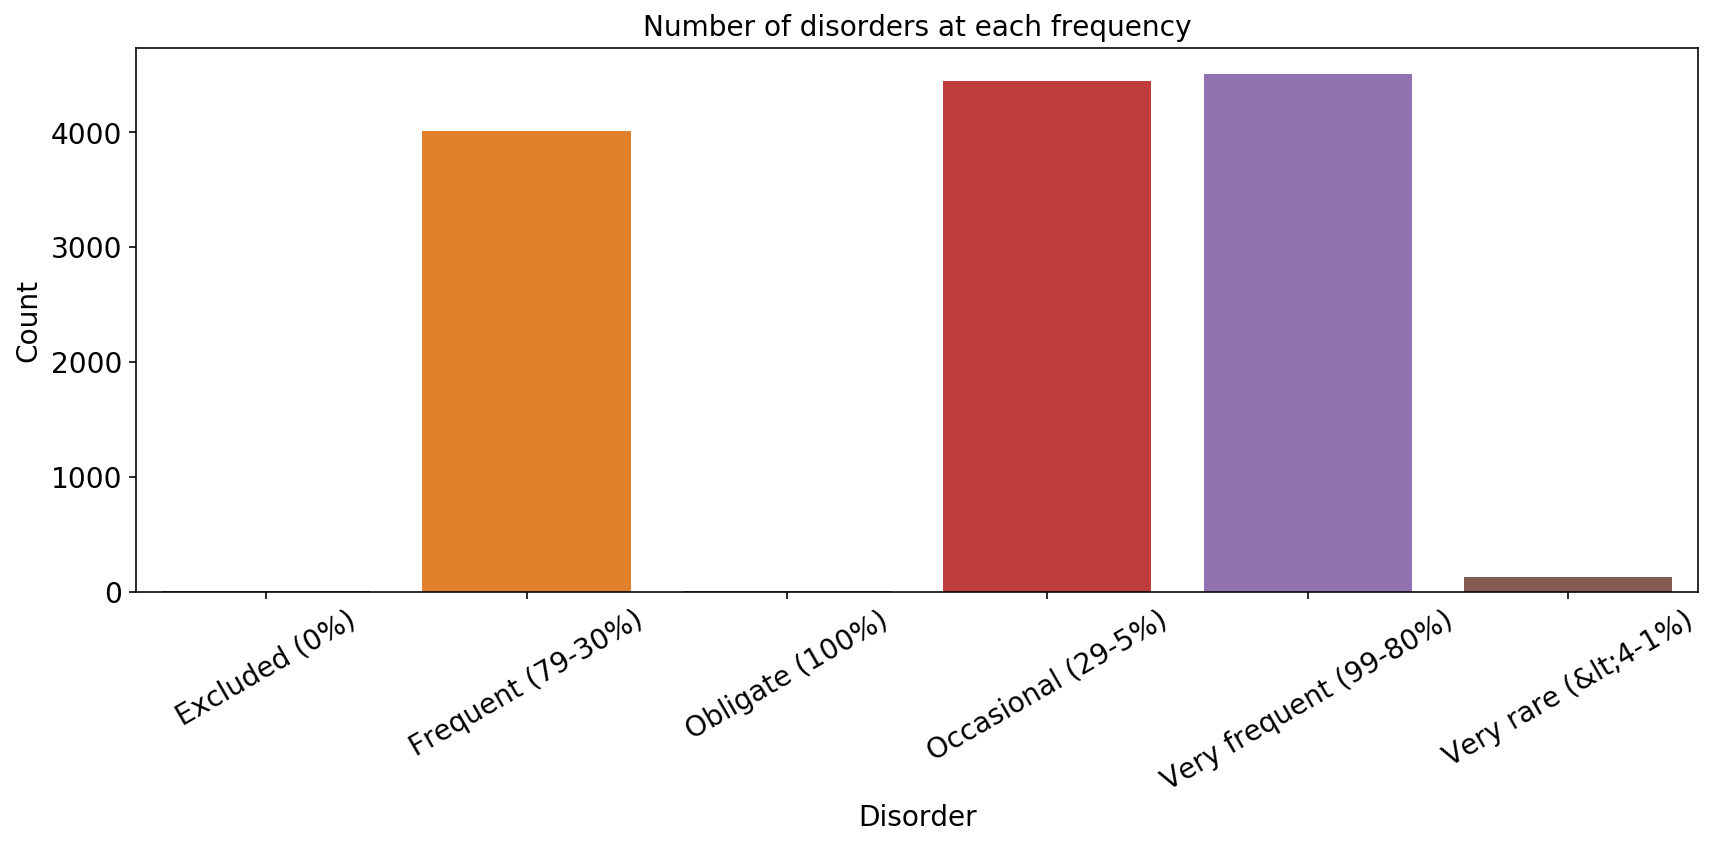

In [42]:
drawPlot(frequency_disorders,'HPOFrequency','Disorder_Name','Disorder','Count','Number of disorders at each frequency')

This would help HCP specialist to see the picture of how many disorders are at each frequency

### Categorizing data by frequency

In [43]:
phenotypes_final['HPOFrequency'].value_counts()

Very frequent (99-80%)    4507
Occasional (29-5%)        4441
Frequent (79-30%)         4012
Very rare (&lt;4-1%)       127
Obligate (100%)              6
Excluded (0%)                3
Name: HPOFrequency, dtype: int64

In [44]:
very_frequent = phenotypes_final.query("HPOFrequency == 'Very frequent (99-80%)'")
occasional = phenotypes_final.query("HPOFrequency == 'Occasional (29-5%)'")
frequent = phenotypes_final.query("HPOFrequency == 'Frequent (79-30%)'")
very_rare = phenotypes_final.query("HPOFrequency == 'Very rare (&lt;4-1%)'")
obligate = phenotypes_final.query("HPOFrequency == 'Obligate (100%)'")
excluded = phenotypes_final.query("HPOFrequency == 'Excluded (0%)'")

In [45]:
very_frequent.head()

,Disorder_OrphaCode,Disorder_Name,Disorder_Type,Diagnostic_Criteria,Disorder_Group,HPO_HPOTerm,HPOFrequency
0,58,Alexander disease,Disease,No sign,Disorder,Macrocephaly,Very frequent (99-80%)
1,58,Alexander disease,Disease,No sign,Disorder,Intellectual disability,Very frequent (99-80%)
2,58,Alexander disease,Disease,No sign,Disorder,Seizures,Very frequent (99-80%)
3,58,Alexander disease,Disease,No sign,Disorder,Spasticity,Very frequent (99-80%)
4,58,Alexander disease,Disease,No sign,Disorder,Agenesis of corpus callosum,Very frequent (99-80%)


Display unique disorder names

In [46]:
very_frequent['Disorder_Name'].value_counts()

Williams syndrome                           49
Cornelia de Lange syndrome                  35
L�ri-Weill dyschondrosteosis                34
Coffin-Lowry syndrome                       32
Distal monosomy 17q                         31
                                            ..
Hypoplastic left heart syndrome              1
Congenital pulmonary airway malformation     1
BOR syndrome                                 1
Barth syndrome                               1
Congenital short bowel syndrome              1
Name: Disorder_Name, Length: 457, dtype: int64

In [47]:
occasional.head()

,Disorder_OrphaCode,Disorder_Name,Disorder_Type,Diagnostic_Criteria,Disorder_Group,HPO_HPOTerm,HPOFrequency
40,58,Alexander disease,Disease,No sign,Disorder,High palate,Occasional (29-5%)
41,58,Alexander disease,Disease,No sign,Disorder,Hydrocephalus,Occasional (29-5%)
42,58,Alexander disease,Disease,No sign,Disorder,Short neck,Occasional (29-5%)
43,58,Alexander disease,Disease,No sign,Disorder,Diabetes mellitus,Occasional (29-5%)
44,58,Alexander disease,Disease,No sign,Disorder,Hypothyroidism,Occasional (29-5%)


Display unique disorder names

In [48]:
occasional['Disorder_Name'].value_counts()

Williams syndrome                                                   85
Fanconi anemia                                                      83
22q11.2 deletion syndrome                                           73
Holoprosencephaly                                                   64
Oculocerebrorenal syndrome of Lowe                                  63
                                                                    ..
Glycogen storage disease due to glucose-6-phosphatase deficiency     1
Non-distal trisomy 13q                                               1
Amelo-onycho-hypohidrotic syndrome                                   1
Oculopharyngeal muscular dystrophy                                   1
Bethlem myopathy                                                     1
Name: Disorder_Name, Length: 349, dtype: int64

In [49]:
frequent.head()

,Disorder_OrphaCode,Disorder_Name,Disorder_Type,Diagnostic_Criteria,Disorder_Group,HPO_HPOTerm,HPOFrequency
17,58,Alexander disease,Disease,No sign,Disorder,Abnormality of eye movement,Frequent (79-30%)
18,58,Alexander disease,Disease,No sign,Disorder,Ptosis,Frequent (79-30%)
19,58,Alexander disease,Disease,No sign,Disorder,Nystagmus,Frequent (79-30%)
20,58,Alexander disease,Disease,No sign,Disorder,Diplopia,Frequent (79-30%)
21,58,Alexander disease,Disease,No sign,Disorder,Emotional lability,Frequent (79-30%)


Display unique disorder names

In [50]:
frequent['Disorder_Name'].value_counts()

Williams syndrome                                53
CHARGE syndrome                                  39
Turner syndrome                                  37
Osteogenesis imperfecta                          36
Jacobsen syndrome                                36
                                                 ..
Familial multiple nevi flammei                    1
Dubin-Johnson syndrome                            1
Hypoplastic left heart syndrome                   1
Non-distal monosomy 10q                           1
Foveal hypoplasia-presenile cataract syndrome     1
Name: Disorder_Name, Length: 398, dtype: int64

In [51]:
very_rare.head()

,Disorder_OrphaCode,Disorder_Name,Disorder_Type,Diagnostic_Criteria,Disorder_Group,HPO_HPOTerm,HPOFrequency
552,881,Turner syndrome,Malformation syndrome,No sign,Disorder,Gonadoblastoma,Very rare (&lt;4-1%)
553,881,Turner syndrome,Malformation syndrome,No sign,Disorder,Gastrointestinal angiodysplasia,Very rare (&lt;4-1%)
554,881,Turner syndrome,Malformation syndrome,No sign,Disorder,Cirrhosis,Very rare (&lt;4-1%)
555,881,Turner syndrome,Malformation syndrome,No sign,Disorder,Inflammation of the large intestine,Very rare (&lt;4-1%)
556,881,Turner syndrome,Malformation syndrome,No sign,Disorder,Biliary cirrhosis,Very rare (&lt;4-1%)


Display unique disorder names

In [52]:
very_rare['Disorder_Name'].value_counts()

Osteogenesis imperfecta                               22
Niemann-Pick disease type C                           13
Turner syndrome                                       12
Abetalipoproteinemia                                  12
Mucopolysaccharidosis type 3                          10
Aicardi-Gouti�res syndrome                             9
Hereditary sensory and autonomic neuropathy type 4     6
Emery-Dreifuss muscular dystrophy                      5
Congenital hydrocephalus                               5
GM1 gangliosidosis                                     4
Central core disease                                   4
46,XX gonadal dysgenesis                               4
Retinoblastoma                                         4
Multiple carboxylase deficiency                        4
Congenital macroglossia                                3
Congenital fiber-type disproportion myopathy           3
Peters plus syndrome                                   3
Oculocutaneous albinism        

In [53]:
obligate.head()

,Disorder_OrphaCode,Disorder_Name,Disorder_Type,Diagnostic_Criteria,Disorder_Group,HPO_HPOTerm,HPOFrequency
1176,790,Retinoblastoma,Disease,Diagnostic criterion,Disorder,Retinoblastoma,Obligate (100%)
4354,2609,Isolated complex I deficiency,Disease,No sign,Disorder,Decreased activity of mitochondrial complex I,Obligate (100%)
9905,243,"46,XX gonadal dysgenesis",Malformation syndrome,No sign,Disorder,Gonadal dysgenesis,Obligate (100%)
9906,243,"46,XX gonadal dysgenesis",Malformation syndrome,No sign,Disorder,Premature ovarian insufficiency,Obligate (100%)
9907,243,"46,XX gonadal dysgenesis",Malformation syndrome,No sign,Disorder,Precocious menopause,Obligate (100%)


Display unique disorder names

In [54]:
obligate['Disorder_Name'].value_counts()

46,XX gonadal dysgenesis                3
Isolated complex I deficiency           1
Congenital left ventricular aneurysm    1
Retinoblastoma                          1
Name: Disorder_Name, dtype: int64

In [55]:
excluded.head()

,Disorder_OrphaCode,Disorder_Name,Disorder_Type,Diagnostic_Criteria,Disorder_Group,HPO_HPOTerm,HPOFrequency
671,261,Emery-Dreifuss muscular dystrophy,Disease,No sign,Disorder,Intellectual disability,Excluded (0%)
723,597,Central core disease,Disease,No sign,Disorder,Rectus femoris muscle atrophy,Excluded (0%)
9930,243,"46,XX gonadal dysgenesis",Malformation syndrome,No sign,Disorder,Ambiguous genitalia,Excluded (0%)


Display unique disorder names

In [56]:
excluded['Disorder_Name'].value_counts()

46,XX gonadal dysgenesis             1
Central core disease                 1
Emery-Dreifuss muscular dystrophy    1
Name: Disorder_Name, dtype: int64

This will allow HCP specialist see the data at each frequency category and see the common disorders at each frequency.

## Possible solution

### Use-case: 
1. HCP specialist will search for disorder name or disorder orpha code based on HPOTerm.
2. He will type the HPOTerm
3. The system will go to each Frequency category and search for HPOTerm. The system will also display the general information about each frequency category. Please refer the barplot above: "*Number of disorders at each frequency*".
4. Once it finds the HPOTerm, all the information about disorder will be displayed: OrphaCode, name, type, diagonstic criteria, and frequency, as well as and the common disorder names in specified frequency.
5. After HCP specialist found the disorder, he/she can refer to the genes data. Based on disorder name or orpha code, he/she will find the information about genes associated with the rare disease.

### Possible suggestion to diagnosing more faster, but this solution needs thorough test

In order to faster diagnose the diseases, we can use Machine Learning. Hovewer, it will be necessary to thoroughly test and check the accuracy of the model. Lives of people are significant. We will deal a with classification problem, specifically, multi-label classification problem. We have features like: HPO_HPOTerm, HPOFrequency, Diagnostic Criteria to predict target column: either OrphaCode or Disorder_Name. The model will predict the possible disorder and print all the metrics: accuracy, f1_score, other business metrics. Maybe we can create our ML algorithm, make our own loss function.

Let's proceed to genes dataset

<a id="genesAnalysis"></a>
## Genes

Question that we need to answer: **Are there common genes that could be readily tested as a part of practice for Rare Diseases?**

### Genes description:
In order to better define rare disorders of genetic origin, **Orphanet provides information on every
gene related to a rare disorder**. This information includes the genetic international nomenclature,
the gene typology, the chromosomal location, the cross-mappings with other international genetic
databases. **Orphanet also defines the relationship between genes and their related rare disorders
and provides the evidence for establishing these gene-disorder relationships**.
The relationship between a gene and a disease is qualified according to the role that the gene plays in the pathogenesis of a disease. Genes are annotated as causative (from germline or somatic mutations), modifiers, major susceptibility factors or playing a role in the phenotype (for chromosomal anomalies). Candidate genes or bio markers are included if a genetic test exists in the clinical setting.

In [57]:
genes.head()

,OrphaCode,ExpertLink,Name,DisorderType_Name,DisorderGroup_Name,DisorderGeneAssociationList_DisorderGeneAssociation_SourceOfValidation,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Name,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Symbol,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_SynonymList_Synonym,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_GeneType_Name,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_ExternalReferenceList_ExternalReference,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList_Locus_GeneLocus,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList_Locus_LocusKey,DisorderGeneAssociationList_DisorderGeneAssociation_DisorderGeneAssociationType_Name,DisorderGeneAssociationList_DisorderGeneAssociation_DisorderGeneAssociationStatus_Name,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_ExternalReferenceList,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_SynonymList,DisorderGeneAssociationList_DisorderGeneAssociation,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_ExternalReferenceList_ExternalReference_Source,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_ExternalReferenceList_ExternalReference_Reference,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList_Locus
0,166024,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Disorder,22587682[PMID],kinesin family member 7,KIF7,JBTS12,gene with protein product,"[{'Source': 'Ensembl', 'Reference': 'ENSG00000...",15q26.1,1.000,Disease-causing germline mutation(s) in,Assessed,NaN,NaN,NaN,NaN,NaN,nan,NaN
1,93,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Aspartylglucosaminuria,Disease,Disorder,11309371[PMID],aspartylglucosaminidase,AGA,"[ASRG, N(4)-(beta-N-acetylglucosaminyl)-L-aspa...",gene with protein product,"[{'Source': 'Reactome', 'Reference': 'P20933'}...",4q34.3,1.000,Disease-causing germline mutation(s) in,Assessed,NaN,NaN,NaN,NaN,NaN,nan,NaN
2,166035,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Brachydactyly-short stature-retinitis pigmento...,Malformation syndrome,Disorder,28285769[PMID],CWC27 spliceosome associated protein homolog,CWC27,"[NY-CO-10, SDCCAG-10]",gene with protein product,NaN,NaN,nan,Disease-causing germline mutation(s) in,Assessed,,,NaN,NaN,NaN,nan,NaN
3,585,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Multiple sulfatase deficiency,Disease,Disorder,17657823[PMID],sulfatase modifying factor 1,SUMF1,"[FGE, UNQ3037]",gene with protein product,"[{'Source': 'Ensembl', 'Reference': 'ENSG00000...",3p26.1,1.000,Disease-causing germline mutation(s) in,Assessed,NaN,NaN,NaN,NaN,NaN,nan,NaN
4,118,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Beta-mannosidosis,Disease,Disorder,18980795[PMID],mannosidase beta,MANBA,beta-mannosidase A,gene with protein product,"[{'Source': 'Reactome', 'Reference': 'O00462'}...",4q24,1.000,Disease-causing germline mutation(s) in,Assessed,NaN,NaN,NaN,NaN,NaN,nan,NaN


We will choose the following columns: *'OrphaCode', 'ExpertLink', 'Name', 'DisorderType_Name','DisorderGroup_Name', 'DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Name',  'DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Symbol',  'DisorderGeneAssociationList_DisorderGeneAssociation_Gene_SynonymList_Synonym','DisorderGeneAssociationList_DisorderGeneAssociation_Gene_GeneType_Name', 'DisorderGeneAssociationList_DisorderGeneAssociation_Gene_ExternalReferenceList_ExternalReference',  'DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList_Locus_GeneLocus',
       'DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList_Locus_LocusKey',
       'DisorderGeneAssociationList_DisorderGeneAssociation_DisorderGeneAssociationType_Name',  'DisorderGeneAssociationList_DisorderGeneAssociation_DisorderGeneAssociationStatus_Name'*.

In [58]:
genes_final = genes.loc[:,['OrphaCode', 'ExpertLink', 'Name', 'DisorderType_Name','DisorderGroup_Name', 'DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Name',  'DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Symbol',  'DisorderGeneAssociationList_DisorderGeneAssociation_Gene_SynonymList_Synonym','DisorderGeneAssociationList_DisorderGeneAssociation_Gene_GeneType_Name', 'DisorderGeneAssociationList_DisorderGeneAssociation_Gene_ExternalReferenceList_ExternalReference',  'DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList_Locus_GeneLocus',
       'DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList_Locus_LocusKey',
       'DisorderGeneAssociationList_DisorderGeneAssociation_DisorderGeneAssociationType_Name',  'DisorderGeneAssociationList_DisorderGeneAssociation_DisorderGeneAssociationStatus_Name']]

In [59]:
genes_final.head()

,OrphaCode,ExpertLink,Name,DisorderType_Name,DisorderGroup_Name,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Name,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Symbol,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_SynonymList_Synonym,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_GeneType_Name,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_ExternalReferenceList_ExternalReference,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList_Locus_GeneLocus,DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList_Locus_LocusKey,DisorderGeneAssociationList_DisorderGeneAssociation_DisorderGeneAssociationType_Name,DisorderGeneAssociationList_DisorderGeneAssociation_DisorderGeneAssociationStatus_Name
0,166024,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Disorder,kinesin family member 7,KIF7,JBTS12,gene with protein product,"[{'Source': 'Ensembl', 'Reference': 'ENSG00000...",15q26.1,1.000,Disease-causing germline mutation(s) in,Assessed
1,93,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Aspartylglucosaminuria,Disease,Disorder,aspartylglucosaminidase,AGA,"[ASRG, N(4)-(beta-N-acetylglucosaminyl)-L-aspa...",gene with protein product,"[{'Source': 'Reactome', 'Reference': 'P20933'}...",4q34.3,1.000,Disease-causing germline mutation(s) in,Assessed
2,166035,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Brachydactyly-short stature-retinitis pigmento...,Malformation syndrome,Disorder,CWC27 spliceosome associated protein homolog,CWC27,"[NY-CO-10, SDCCAG-10]",gene with protein product,NaN,NaN,nan,Disease-causing germline mutation(s) in,Assessed
3,585,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Multiple sulfatase deficiency,Disease,Disorder,sulfatase modifying factor 1,SUMF1,"[FGE, UNQ3037]",gene with protein product,"[{'Source': 'Ensembl', 'Reference': 'ENSG00000...",3p26.1,1.000,Disease-causing germline mutation(s) in,Assessed
4,118,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Beta-mannosidosis,Disease,Disorder,mannosidase beta,MANBA,beta-mannosidase A,gene with protein product,"[{'Source': 'Reactome', 'Reference': 'O00462'}...",4q24,1.000,Disease-causing germline mutation(s) in,Assessed


In [112]:
genes_final.query("Name == 'Williams syndrome'")

,OrphaCode,ExpertLink,Name,DisorderType_Name,DisorderGroup_Name,Associated_Gene_name,Associated_Gene_Symbol,Associated_Gene_Synonyms,Associated_Gene_Type,Associated_Gene_External_Reference,Associated_Gene_Locus,Associated_Gene_Locus_Key,Disorder_Gene_Relation_Type,Associated_Gene_Status
86,904,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Williams syndrome,Malformation syndrome,Disorder,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN


Rename the columns

In [60]:
genes_final = genes_final.rename(columns={"DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Name": "Associated_Gene_name",
                                          "DisorderGeneAssociationList_DisorderGeneAssociation_Gene_Symbol": "Associated_Gene_Symbol",
                                          "DisorderGeneAssociationList_DisorderGeneAssociation_Gene_SynonymList_Synonym": "Associated_Gene_Synonyms",
                                          "DisorderGeneAssociationList_DisorderGeneAssociation_Gene_GeneType_Name": "Associated_Gene_Type",
                                          "DisorderGeneAssociationList_DisorderGeneAssociation_Gene_ExternalReferenceList_ExternalReference": "Associated_Gene_External_Reference",
                                          "DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList_Locus_GeneLocus": "Associated_Gene_Locus", 
                                          "DisorderGeneAssociationList_DisorderGeneAssociation_Gene_LocusList_Locus_LocusKey": "Associated_Gene_Locus_Key",
                                          "DisorderGeneAssociationList_DisorderGeneAssociation_DisorderGeneAssociationType_Name":"Disorder_Gene_Relation_Type",
                                          "DisorderGeneAssociationList_DisorderGeneAssociation_DisorderGeneAssociationStatus_Name": "Associated_Gene_Status"})

In [61]:
genes_final.head()

,OrphaCode,ExpertLink,Name,DisorderType_Name,DisorderGroup_Name,Associated_Gene_name,Associated_Gene_Symbol,Associated_Gene_Synonyms,Associated_Gene_Type,Associated_Gene_External_Reference,Associated_Gene_Locus,Associated_Gene_Locus_Key,Disorder_Gene_Relation_Type,Associated_Gene_Status
0,166024,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Disorder,kinesin family member 7,KIF7,JBTS12,gene with protein product,"[{'Source': 'Ensembl', 'Reference': 'ENSG00000...",15q26.1,1.000,Disease-causing germline mutation(s) in,Assessed
1,93,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Aspartylglucosaminuria,Disease,Disorder,aspartylglucosaminidase,AGA,"[ASRG, N(4)-(beta-N-acetylglucosaminyl)-L-aspa...",gene with protein product,"[{'Source': 'Reactome', 'Reference': 'P20933'}...",4q34.3,1.000,Disease-causing germline mutation(s) in,Assessed
2,166035,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Brachydactyly-short stature-retinitis pigmento...,Malformation syndrome,Disorder,CWC27 spliceosome associated protein homolog,CWC27,"[NY-CO-10, SDCCAG-10]",gene with protein product,NaN,NaN,nan,Disease-causing germline mutation(s) in,Assessed
3,585,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Multiple sulfatase deficiency,Disease,Disorder,sulfatase modifying factor 1,SUMF1,"[FGE, UNQ3037]",gene with protein product,"[{'Source': 'Ensembl', 'Reference': 'ENSG00000...",3p26.1,1.000,Disease-causing germline mutation(s) in,Assessed
4,118,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Beta-mannosidosis,Disease,Disorder,mannosidase beta,MANBA,beta-mannosidase A,gene with protein product,"[{'Source': 'Reactome', 'Reference': 'O00462'}...",4q24,1.000,Disease-causing germline mutation(s) in,Assessed


## Top-50 common genes associated with rare diseases

In [62]:
genes_final['Associated_Gene_name'].value_counts().head(50)

isocitrate dehydrogenase (NADP(+)) 2, mitochondrial                    6
alkaline phosphatase, biomineralization associated                     6
von Willebrand factor                                                  6
KIT proto-oncogene, receptor tyrosine kinase                           5
fibroblast growth factor receptor 2                                    5
hemoglobin subunit beta                                                5
collagen type II alpha 1 chain                                         4
coagulation factor VIII                                                4
lamin A/C                                                              4
coagulation factor IX                                                  4
noggin                                                                 3
L1 cell adhesion molecule                                              3
patatin like phospholipase domain containing 6                         3
prion protein                                      

Display the information about the gene and the list of associations

In [63]:
genes_final.query("Associated_Gene_name =='von Willebrand factor'")

,OrphaCode,ExpertLink,Name,DisorderType_Name,DisorderGroup_Name,Associated_Gene_name,Associated_Gene_Symbol,Associated_Gene_Synonyms,Associated_Gene_Type,Associated_Gene_External_Reference,Associated_Gene_Locus,Associated_Gene_Locus_Key,Disorder_Gene_Relation_Type,Associated_Gene_Status
6,166078,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Von Willebrand disease type 1,Clinical subtype,Subtype of disorder,von Willebrand factor,VWF,NaN,gene with protein product,"[{'Source': 'Ensembl', 'Reference': 'ENSG00000...",12p13.31,1.000,Disease-causing germline mutation(s) in,Assessed
9,166084,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Von Willebrand disease type 2A,Clinical subtype,Subtype of disorder,von Willebrand factor,VWF,NaN,gene with protein product,"[{'Source': 'Ensembl', 'Reference': 'ENSG00000...",12p13.31,1.000,Disease-causing germline mutation(s) in,Assessed
12,166090,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Von Willebrand disease type 2M,Clinical subtype,Subtype of disorder,von Willebrand factor,VWF,NaN,gene with protein product,"[{'Source': 'Ensembl', 'Reference': 'ENSG00000...",12p13.31,1.000,Disease-causing germline mutation(s) in,Assessed
13,166087,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Von Willebrand disease type 2B,Clinical subtype,Subtype of disorder,von Willebrand factor,VWF,NaN,gene with protein product,"[{'Source': 'Ensembl', 'Reference': 'ENSG00000...",12p13.31,1.000,Disease-causing germline mutation(s) in,Assessed
15,166093,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Von Willebrand disease type 2N,Clinical subtype,Subtype of disorder,von Willebrand factor,VWF,NaN,gene with protein product,"[{'Source': 'Ensembl', 'Reference': 'ENSG00000...",12p13.31,1.000,Disease-causing germline mutation(s) in,Assessed
17,166096,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Von Willebrand disease type 3,Clinical subtype,Subtype of disorder,von Willebrand factor,VWF,NaN,gene with protein product,"[{'Source': 'Ensembl', 'Reference': 'ENSG00000...",12p13.31,1.000,Disease-causing germline mutation(s) in,Assessed


HCP specialist types the name of the disease. The system will display the list of genes associated with that rare disease. **However, not all diseases have information about the genes associated with that disease**.

In [64]:
genes_final.query("Name =='Schwartz-Jampel syndrome'")

,OrphaCode,ExpertLink,Name,DisorderType_Name,DisorderGroup_Name,Associated_Gene_name,Associated_Gene_Symbol,Associated_Gene_Synonyms,Associated_Gene_Type,Associated_Gene_External_Reference,Associated_Gene_Locus,Associated_Gene_Locus_Key,Disorder_Gene_Relation_Type,Associated_Gene_Status
131,800,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Schwartz-Jampel syndrome,Disease,Disorder,heparan sulfate proteoglycan 2,HSPG2,"[PRCAN, perlecan, perlecan proteoglycan]",gene with protein product,"[{'Source': 'Ensembl', 'Reference': 'ENSG00000...",1p36.12,1.000,Disease-causing germline mutation(s) (loss of ...,Assessed


### Use case:
- #### Looking at genes specifically:
1. HCP specialist is looking for common genes associated with rare diseases. Or HCP specialist already has the gene name or the location-> go to step 3
2. The system will display top-50 common genes. Or HCP can specify the number of genes
3. Then he/she can click on the gene. The information about the gene and the list of associations with rare diseases get displayed

- #### Disorder from phenotype data:
1. Once HCP specialist found the disease from phenotype, he/she can look for the genes associated with that disorder
2. HCP specialist types the name of the disease. The system will display the list of genes associated with that rare disease.
3. The list of genes will have the general information of each gene: locus, synonym, type, relation with disease, status...

Let's move on to functional consequences.

<a id="functionalConseqAnalysis"></a>
## Functional Consequences

Question that we need to answer: **What are some top considerations in relation to functional consequences of Rare Diseases?**

### Functional consequences description: 
The Orphanet inventory of rare diseases is annotated with activity limitation/participation restriction (functional consequences), using the Orphanet Functioning Thesaurus, derived and adapted from the International Classification of Functioning, Disability and Health – Children and Youth (ICF-CY, WHO 2007).
The information provided is assessed taking into account the whole patient population affected by the disease, receiving standard care and management (specific and/or symptomatic management, prevention and prophylaxis, devices and aids, care and support). Functioning is divided into different abilities, tasks and activities. **Disability therefore involves limitation of activity or restriction of participation, described as functional consequences**.

Each functional consequence is annotated with the following:
- Frequency in the patient population: 
    - fewer than 30%
    - Very frequent: more than 80%
    - Frequent: between 30% and 80%
- Temporality:
    - Permanent limitation/restriction: the functional consequence is present throughout the life of the patient. It can be congenital, secondary to loss of a skill or a participation. It can be a direct or indirect consequence of the disease or of its treatment.
    - Transient limitation/restriction: the functional consequence occurs during acute episodes, periodic crises or relapses. It resolves or reduces spontaneously or by the action of a treatment or care.
    - Delayed acquisition: a skill or a participation is performed later than by a healthy person.
- Degree of severity:
    - Low: activity or participation can be carried out with little difficulty by the patient alone.
    - Moderate: activity or participation can be carried out with some technical and/or human assistance
    - Severe: activity or participation cannot be carried out without substantial technical and/or human assistance.
    - Complete: activity or participation cannot be carried out, even with technical and/or human assistance.
    - Unspecified: limitation/restriction is difficult to quantify or highly variable between patients (ranging from 'Low' to 'Complete').
- Loss of ability when relevant, defined by the progressive and definitive loss of a skill or participation over the course of the disease.

A functional limitation is stated to be « undefined » when the current knowledge does not enable information about the extent of the consequences on daily life to be provided. The unaffected activities and participation are not listed. Environmental factors that may have an impact on the daily activities of the patients are also identified and listed when possible.

We will choose the following columns: *'Disorder_Name', 'Disorder_OrphaCode', 'Disorder_ExpertLink', 'Disorder_DisorderGroup_Name', 'Disorder_DisorderType_Name', 'Disability_Name', 'FrequenceDisability_Name', 'TemporalityDisability_Name', 'SeverityDisability_Name', 'Type', 'Defined', 'LossOfAbility', 'StatusDisability_Name', 'DisabilityCategory_Name'*

In [65]:
functional.head()

,LossOfAbility,Type,Defined,Disability_Name,FrequenceDisability_Name,TemporalityDisability_Name,SeverityDisability_Name,SourceOfValidation,SpecificManagement,Online,AnnotationDate,ReasonForNotApplicable,Disorder_OrphaCode,Disorder_ExpertLink,Disorder_Name,Disorder_DisorderType_Name,Disorder_DisorderGroup_Name,StatusDisability_Name,DisabilityCategory_Name,Disorder_DisabilityDisorderAssociationList
0,n,Disability,y,Seeing/watching,Very frequent,Permanent limitation,Moderate,Expert,n,y,2018-06-29 00:00:00.0,,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,WAGR syndrome,Malformation syndrome,Disorder,Not validated,Activity limitation/participation restriction,NaN
1,n,Disability,y,Hearing/listening,Frequent,Acquisition delay,Unspecified,Expert,n,y,2018-06-29 00:00:00.0,,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,WAGR syndrome,Malformation syndrome,Disorder,Not validated,Activity limitation/participation restriction,NaN
2,n,Disability,y,Acquiring language,Very frequent,Acquisition delay,Moderate,Expert,n,y,2018-06-29 00:00:00.0,,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,WAGR syndrome,Malformation syndrome,Disorder,Not validated,Activity limitation/participation restriction,NaN
3,n,Disability,y,Learning to read,Very frequent,Acquisition delay,Low,Expert,n,y,2018-06-29 00:00:00.0,,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,WAGR syndrome,Malformation syndrome,Disorder,Not validated,Activity limitation/participation restriction,NaN
4,n,Disability,y,Learning to write,Very frequent,Acquisition delay,Severe,Expert,n,y,2018-06-29 00:00:00.0,,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,WAGR syndrome,Malformation syndrome,Disorder,Not validated,Activity limitation/participation restriction,NaN


In [66]:
functional_final = functional.loc[:,['Disorder_Name', 'Disorder_OrphaCode', 'Disorder_ExpertLink', 'Disorder_DisorderGroup_Name', 'Disorder_DisorderType_Name', 'Disability_Name', 'FrequenceDisability_Name', 'TemporalityDisability_Name', 'SeverityDisability_Name', 'Type', 'Defined', 'LossOfAbility', 'StatusDisability_Name', 'DisabilityCategory_Name']]

In [67]:
functional_final.head()

,Disorder_Name,Disorder_OrphaCode,Disorder_ExpertLink,Disorder_DisorderGroup_Name,Disorder_DisorderType_Name,Disability_Name,FrequenceDisability_Name,TemporalityDisability_Name,SeverityDisability_Name,Type,Defined,LossOfAbility,StatusDisability_Name,DisabilityCategory_Name
0,WAGR syndrome,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Disorder,Malformation syndrome,Seeing/watching,Very frequent,Permanent limitation,Moderate,Disability,y,n,Not validated,Activity limitation/participation restriction
1,WAGR syndrome,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Disorder,Malformation syndrome,Hearing/listening,Frequent,Acquisition delay,Unspecified,Disability,y,n,Not validated,Activity limitation/participation restriction
2,WAGR syndrome,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Disorder,Malformation syndrome,Acquiring language,Very frequent,Acquisition delay,Moderate,Disability,y,n,Not validated,Activity limitation/participation restriction
3,WAGR syndrome,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Disorder,Malformation syndrome,Learning to read,Very frequent,Acquisition delay,Low,Disability,y,n,Not validated,Activity limitation/participation restriction
4,WAGR syndrome,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Disorder,Malformation syndrome,Learning to write,Very frequent,Acquisition delay,Severe,Disability,y,n,Not validated,Activity limitation/participation restriction


Let's rename the columns

In [68]:
functional_final = functional_final.rename(columns={"FrequenceDisability_Name": "FrequenceDisability",
                                                     "TemporalityDisability_Name":"TemporalityDisability",
                                                    "SeverityDisability_Name": "SeverityDisability",
                                                    "StatusDisability_Name": "StatusDisability",
                                                    "DisabilityCategory_Name": "DisabilityCategory",
                                                    "Disorder_DisorderGroup_Name": "Disorder_DisorderGroup",
                                                    "Disorder_DisorderType_Name": "Disorder_DisorderType"})

In [69]:
functional_final.head()

,Disorder_Name,Disorder_OrphaCode,Disorder_ExpertLink,Disorder_DisorderGroup,Disorder_DisorderType,Disability_Name,FrequenceDisability,TemporalityDisability,SeverityDisability,Type,Defined,LossOfAbility,StatusDisability,DisabilityCategory
0,WAGR syndrome,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Disorder,Malformation syndrome,Seeing/watching,Very frequent,Permanent limitation,Moderate,Disability,y,n,Not validated,Activity limitation/participation restriction
1,WAGR syndrome,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Disorder,Malformation syndrome,Hearing/listening,Frequent,Acquisition delay,Unspecified,Disability,y,n,Not validated,Activity limitation/participation restriction
2,WAGR syndrome,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Disorder,Malformation syndrome,Acquiring language,Very frequent,Acquisition delay,Moderate,Disability,y,n,Not validated,Activity limitation/participation restriction
3,WAGR syndrome,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Disorder,Malformation syndrome,Learning to read,Very frequent,Acquisition delay,Low,Disability,y,n,Not validated,Activity limitation/participation restriction
4,WAGR syndrome,893,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Disorder,Malformation syndrome,Learning to write,Very frequent,Acquisition delay,Severe,Disability,y,n,Not validated,Activity limitation/participation restriction


## Characteristics of functional consequences

From our point of view, there are 3 main characteristics of functional consequences: **temporality, degree of severity, loss of ability**, 

## Temporality

- Permanent limitation/restriction: the functional consequence is present throughout the life of the patient. It can be congenital, secondary to loss of a skill or a participation. It can be a direct or indirect consequence of the disease or of its treatment.
- Transient limitation/restriction: the functional consequence occurs during acute episodes, periodic crises or relapses. It resolves or reduces spontaneously or by the action of a treatment or care.
- Delayed acquisition: a skill or a participation is performed later than by a healthy person.

Let's see first the unique values and their frequency.

In [70]:
functional_final['TemporalityDisability'].value_counts()

Permanent limitation    5248
Acquisition delay       1214
Transient limitation    1056
Name: TemporalityDisability, dtype: int64

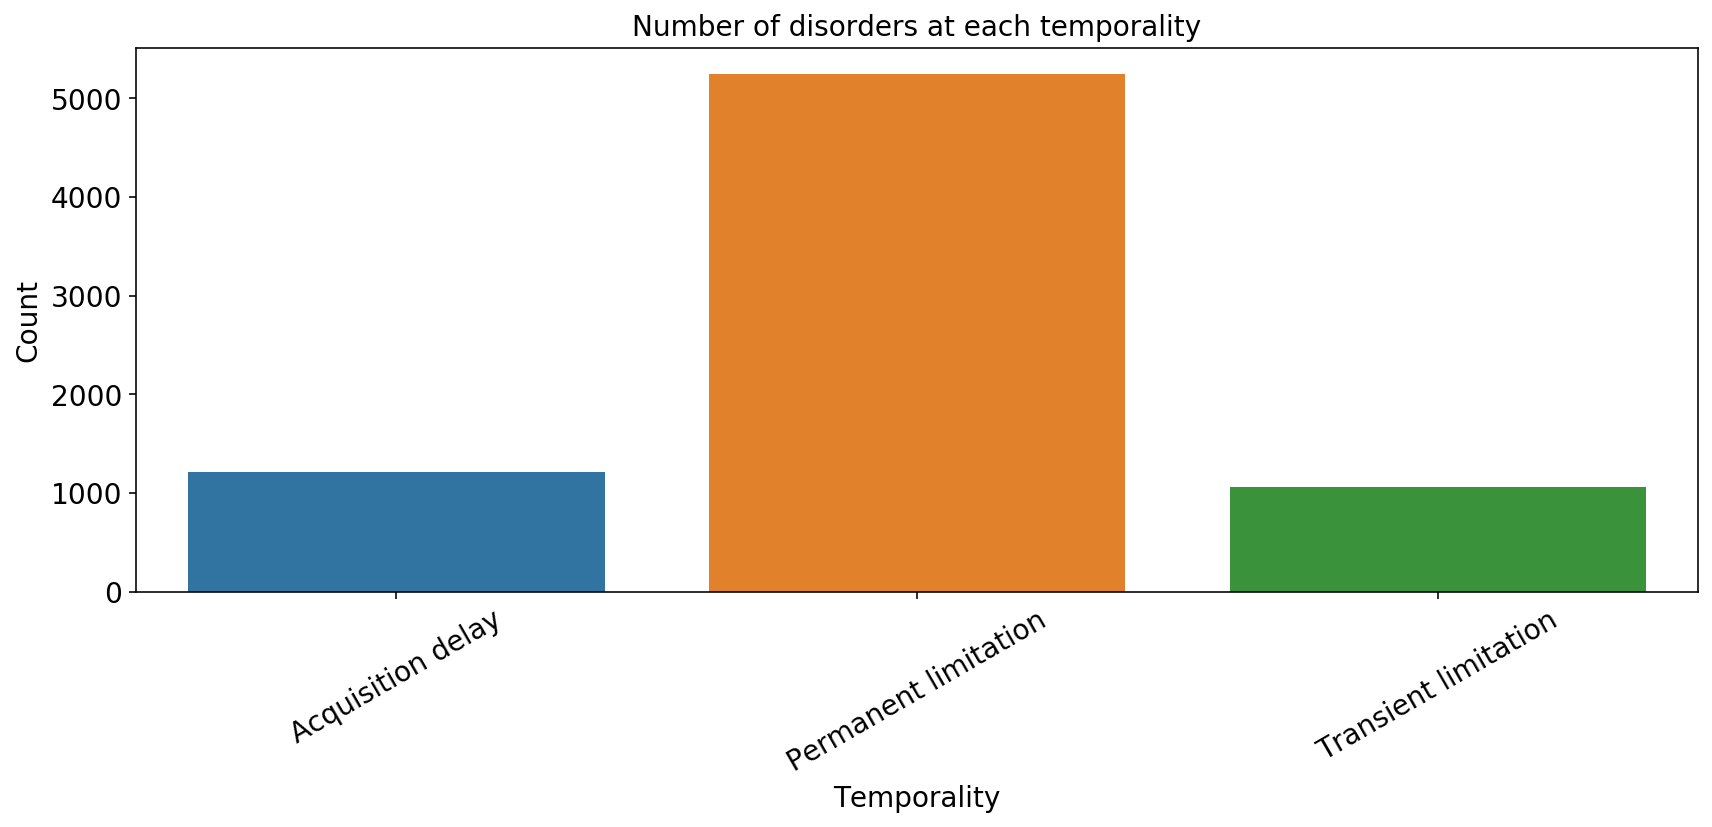

In [71]:
frequency_temporality = functional_final.groupby('TemporalityDisability').count().reset_index()
frequency_temporality = frequency_temporality.loc[:,['TemporalityDisability','Disability_Name']]
drawPlot(frequency_temporality,'TemporalityDisability','Disability_Name','Temporality','Count','Number of disorders at each temporality')

Most of the disabilities have a *Permanent limitation*. *Acquisition delay and Transient limitation* have almost same amount of disabilities.

Filter data by temporality

In [72]:
permanent_limit = functional_final.query("TemporalityDisability == 'Permanent limitation'")
acquisition_delay = functional_final.query("TemporalityDisability == 'Acquisition delay'")
transient_limit = functional_final.query("TemporalityDisability == 'Transient limitation'")

In [73]:
permanent_limit.loc[:,['Disability_Name', 'TemporalityDisability', 'StatusDisability', 'LossOfAbility' , 'DisabilityCategory', 'Disorder_Name','Disorder_OrphaCode']].head()

,Disability_Name,TemporalityDisability,StatusDisability,LossOfAbility,DisabilityCategory,Disorder_Name,Disorder_OrphaCode
0,Seeing/watching,Permanent limitation,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
6,Reading,Permanent limitation,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
7,Writing,Permanent limitation,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
8,Calculating,Permanent limitation,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
9,Focusing attention,Permanent limitation,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893


In [74]:
acquisition_delay.loc[:,['Disability_Name', 'TemporalityDisability', 'StatusDisability', 'LossOfAbility' , 'DisabilityCategory', 'Disorder_Name','Disorder_OrphaCode']].head()

,Disability_Name,TemporalityDisability,StatusDisability,LossOfAbility,DisabilityCategory,Disorder_Name,Disorder_OrphaCode
1,Hearing/listening,Acquisition delay,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
2,Acquiring language,Acquisition delay,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
3,Learning to read,Acquisition delay,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
4,Learning to write,Acquisition delay,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
5,Learning to calculate,Acquisition delay,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893


In [75]:
transient_limit.loc[:,['Disability_Name', 'TemporalityDisability', 'StatusDisability', 'LossOfAbility' , 'DisabilityCategory', 'Disorder_Name','Disorder_OrphaCode']].head()

,Disability_Name,TemporalityDisability,StatusDisability,LossOfAbility,DisabilityCategory,Disorder_Name,Disorder_OrphaCode
202,Seeing/watching,Transient limitation,Not validated,n,Activity limitation/participation restriction,Waldenstr�m macroglobulinemia,33226
205,Learning,Transient limitation,Not validated,n,Activity limitation/participation restriction,Waldenstr�m macroglobulinemia,33226
208,Applying knowledge,Transient limitation,Not validated,n,Activity limitation/participation restriction,Waldenstr�m macroglobulinemia,33226
211,Calculating,Transient limitation,Not validated,n,Activity limitation/participation restriction,Waldenstr�m macroglobulinemia,33226
214,Focusing attention,Transient limitation,Not validated,n,Activity limitation/participation restriction,Waldenstr�m macroglobulinemia,33226


HCP specialist may look at the list of disabilities based on disorder and what the temporality of those disablities.

## Degree of Severity

- Low: activity or participation can be carried out with little difficulty by the patient alone.
- Moderate: activity or participation can be carried out with some technical and/or human assistance
- Severe: activity or participation cannot be carried out without substantial technical and/or human assistance.
- Complete: activity or participation cannot be carried out, even with technical and/or human assistance.
- Unspecified: limitation/restriction is difficult to quantify or highly variable between patients (ranging from 'Low' to 'Complete').

Display the unique values fo severity and the frequency

In [76]:
functional_final['SeverityDisability'].value_counts()

Severe         2402
Moderate       2372
Low            1173
Unspecified     975
Complete        596
Name: SeverityDisability, dtype: int64

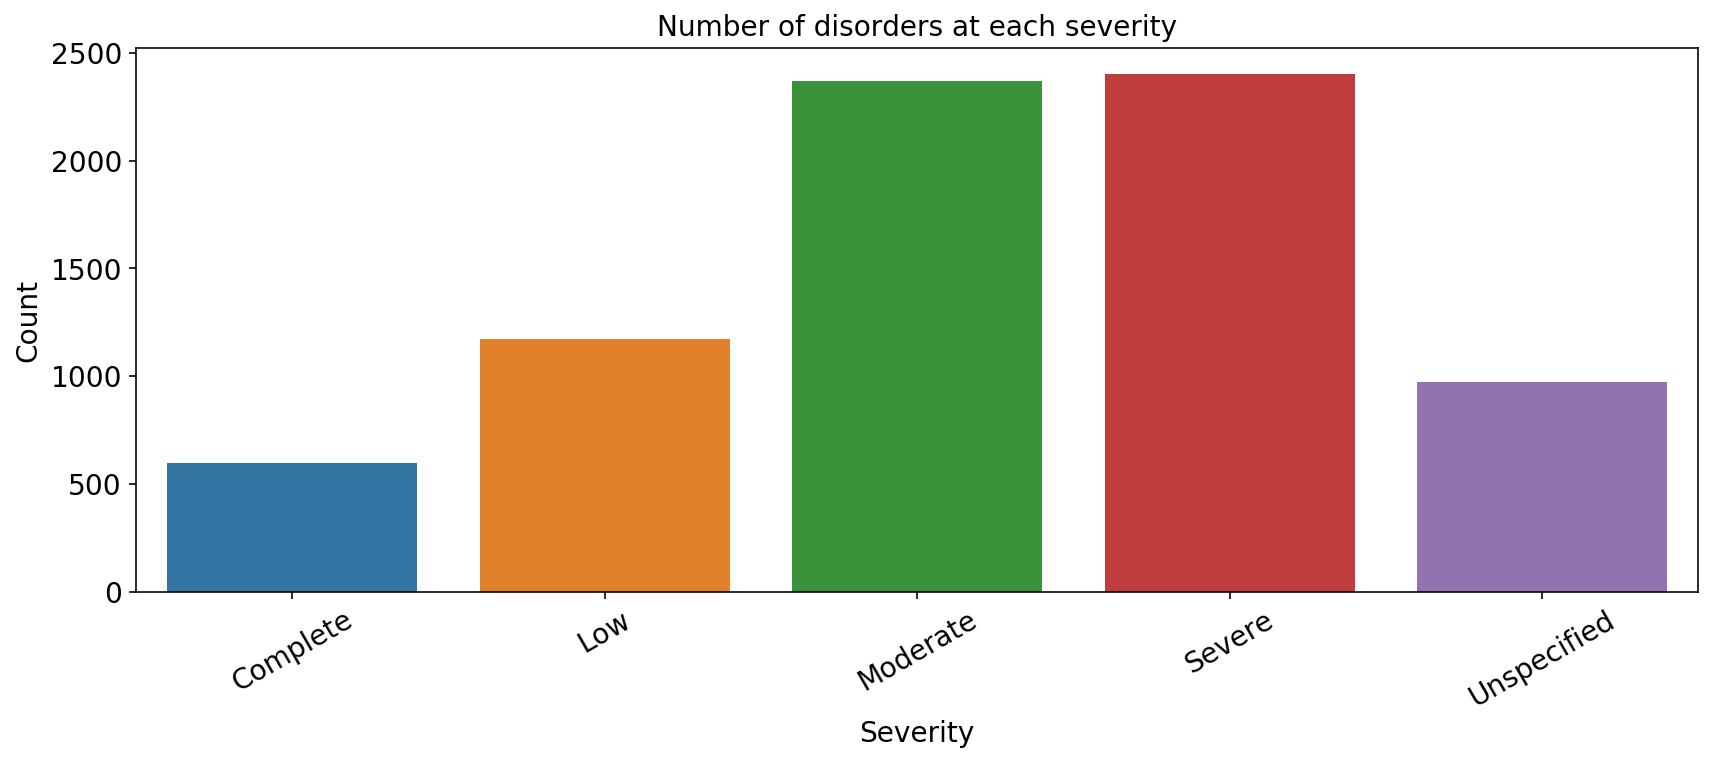

In [77]:
frequency_temporality = functional_final.groupby('SeverityDisability').count().reset_index()
frequency_temporality = frequency_temporality.loc[:,['SeverityDisability','Disability_Name']]
drawPlot(frequency_temporality,'SeverityDisability','Disability_Name','Severity','Count','Number of disorders at each severity')

Most of the disabilities have *severe and moderate* conditions. Small portion of disabilites have a *complete degree of severity*. *Low and unspecified* have almost the same amount of disabilities ~1000.

Let's filter data by severity

In [78]:
severe = functional_final.query("SeverityDisability == 'Severe'")
moderate = functional_final.query("SeverityDisability == 'Moderate'")
low = functional_final.query("SeverityDisability == 'Low'")
unspecified = functional_final.query("SeverityDisability == 'Unspecified'")
complete = functional_final.query("SeverityDisability == 'Complete'")

In [79]:
severe.loc[:,['Disability_Name', 'SeverityDisability', 'StatusDisability', 'LossOfAbility' , 'DisabilityCategory', 'Disorder_Name','Disorder_OrphaCode']].head()

,Disability_Name,SeverityDisability,StatusDisability,LossOfAbility,DisabilityCategory,Disorder_Name,Disorder_OrphaCode
4,Learning to write,Severe,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
5,Learning to calculate,Severe,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
8,Calculating,Severe,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
18,Receiving written messages,Severe,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
21,Producing nonverbal messages,Severe,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893


In [80]:
moderate.loc[:,['Disability_Name', 'SeverityDisability', 'StatusDisability', 'LossOfAbility' , 'DisabilityCategory', 'Disorder_Name','Disorder_OrphaCode']].head()

,Disability_Name,SeverityDisability,StatusDisability,LossOfAbility,DisabilityCategory,Disorder_Name,Disorder_OrphaCode
0,Seeing/watching,Moderate,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
2,Acquiring language,Moderate,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
6,Reading,Moderate,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
7,Writing,Moderate,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
9,Focusing attention,Moderate,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893


In [81]:
low.loc[:,['Disability_Name', 'SeverityDisability', 'StatusDisability', 'LossOfAbility' , 'DisabilityCategory', 'Disorder_Name','Disorder_OrphaCode']].head()

,Disability_Name,SeverityDisability,StatusDisability,LossOfAbility,DisabilityCategory,Disorder_Name,Disorder_OrphaCode
3,Learning to read,Low,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
10,Memorizing and retrieving,Low,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
15,Receiving spoken messages,Low,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
17,Receiving nonverbal messages,Low,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
25,Standing,Low,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893


In [82]:
unspecified.loc[:,['Disability_Name', 'SeverityDisability', 'StatusDisability', 'LossOfAbility' , 'DisabilityCategory', 'Disorder_Name','Disorder_OrphaCode']].head()

,Disability_Name,SeverityDisability,StatusDisability,LossOfAbility,DisabilityCategory,Disorder_Name,Disorder_OrphaCode
1,Hearing/listening,Unspecified,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
35,Walking long distances,Unspecified,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
38,"Caring for body parts (skin, teeth, nails, hai...",Unspecified,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
42,Eating,Unspecified,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893
48,Staying awake,Unspecified,Not validated,n,Activity limitation/participation restriction,WAGR syndrome,893


In [83]:
complete.loc[:,['Disability_Name', 'SeverityDisability', 'StatusDisability', 'LossOfAbility' , 'DisabilityCategory', 'Disorder_Name','Disorder_OrphaCode']].head()

,Disability_Name,SeverityDisability,StatusDisability,LossOfAbility,DisabilityCategory,Disorder_Name,Disorder_OrphaCode
304,Walking long distances,Complete,Validated,y,Activity limitation/participation restriction,Werner syndrome,902
323,"Performing vigorous activities (climbing, runn...",Complete,Validated,y,Activity limitation/participation restriction,Werner syndrome,902
401,Learning to read,Complete,Not validated,n,Activity limitation/participation restriction,West syndrome,3451
402,Learning to write,Complete,Not validated,n,Activity limitation/participation restriction,West syndrome,3451
403,Learning to calculate,Complete,Not validated,n,Activity limitation/participation restriction,West syndrome,3451


HCP specialist may look at the list of disabilities based on disorder and what the severity of those disablities.

## Loss of ability

- Loss of ability when relevant, defined by the progressive and definitive loss of a skill or participation over the course of the disease.

Display unique values and the frequences

In [84]:
functional_final['LossOfAbility'].value_counts()

n    5259
y    2849
Name: LossOfAbility, dtype: int64

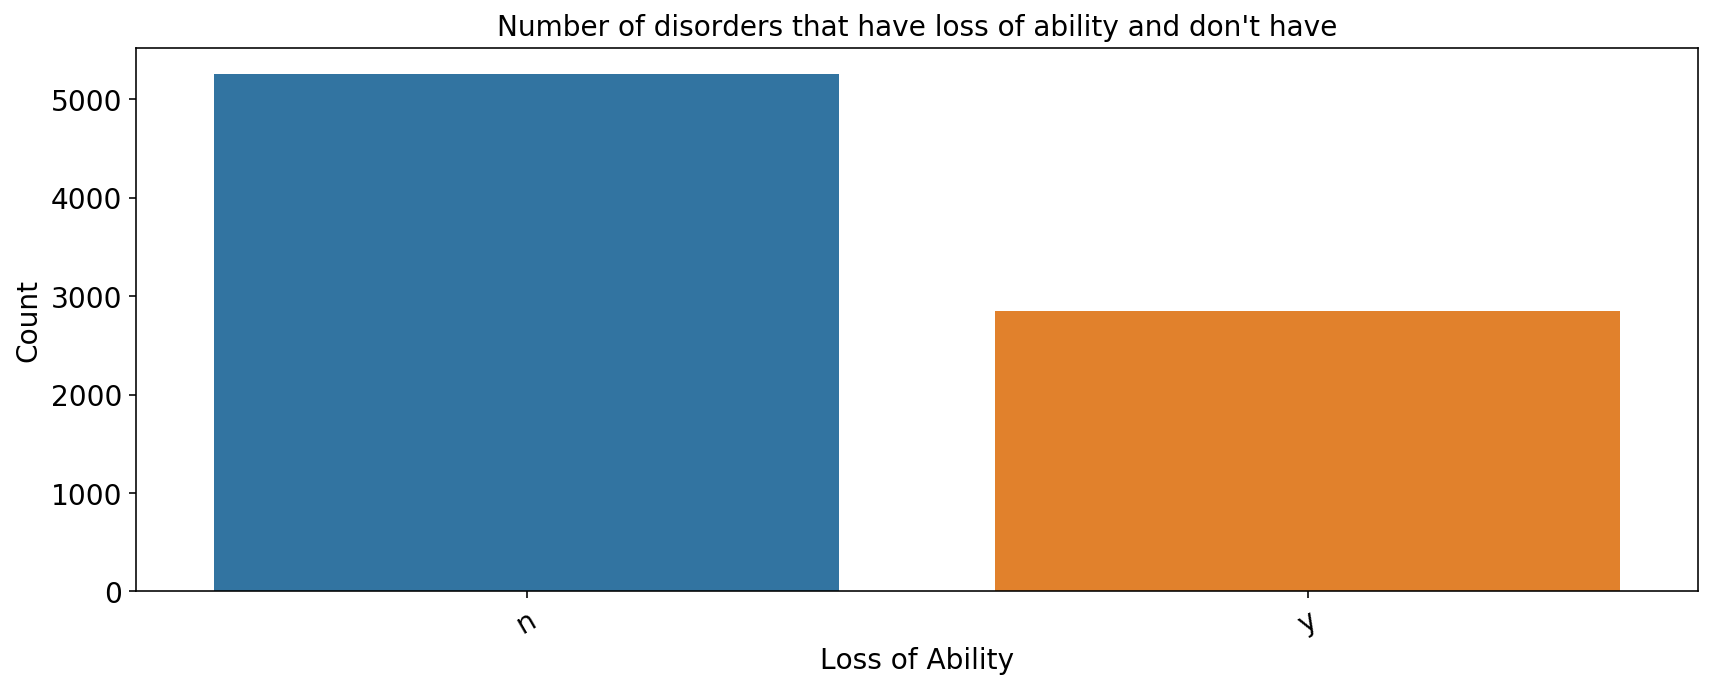

In [85]:
frequency_temporality = functional_final.groupby('LossOfAbility').count().reset_index()
frequency_temporality = frequency_temporality.loc[:,['LossOfAbility','Disability_Name']]
drawPlot(frequency_temporality,'LossOfAbility','Disability_Name','Loss of Ability','Count',"Number of disorders that have loss of ability and don't have")

Most of the disabilities don't have loss of ability.

In [86]:
have_loss = functional_final.query("LossOfAbility == 'y'")
no_have_loss = functional_final.query("LossOfAbility == 'n'")

In [87]:
have_loss.loc[:,['LossOfAbility','Disability_Name','StatusDisability','Disorder_Name','Disorder_OrphaCode']].head()

,LossOfAbility,Disability_Name,StatusDisability,Disorder_Name,Disorder_OrphaCode
16,y,Receiving messages in sign language,Not validated,WAGR syndrome,893
20,y,Producing messages in sign language,Not validated,WAGR syndrome,893
87,y,Light intensity,Not validated,WAGR syndrome,893
88,y,Light quality,Not validated,WAGR syndrome,893
89,y,Day/night cycles,Not validated,WAGR syndrome,893


In [88]:
no_have_loss.loc[:,['LossOfAbility','Disability_Name','StatusDisability','Disorder_Name','Disorder_OrphaCode']].head()

,LossOfAbility,Disability_Name,StatusDisability,Disorder_Name,Disorder_OrphaCode
0,n,Seeing/watching,Not validated,WAGR syndrome,893
1,n,Hearing/listening,Not validated,WAGR syndrome,893
2,n,Acquiring language,Not validated,WAGR syndrome,893
3,n,Learning to read,Not validated,WAGR syndrome,893
4,n,Learning to write,Not validated,WAGR syndrome,893


HCP specialist may look at the loss of ability based on the disorder and disability. 

### Use cases: 
- HCP specialist may look at the list of disabilities based on disorder. Also, he/she will determine what the temporality of those disablities.
- HCP specialist may look at the list of disabilities based on disorder. Moreover, he/she will determine the severity of those disablities.
- HCP specialist may look at the loss of ability based on the disorder and disability. 

Let's move on to epidemiology

<a id="epidemiologyAnalysis"></a>
## Epidemiology

Question we need to answer: **Based on findings, do we believe different groups (e.g. socioeconomic, location, background) will encounter different challenges with the burden of rare diseases?**

Epidemiological data on disorders, group of disorders or sub-type: point prevalence, birth prevalence, lifelong prevalence and incidence, or the number of cases/families reported together with their respective intervals per geographical area (country, continent) are available. 

In [89]:
epidemiology.head()

,DisorderGroup_Name,DisorderType_Name,ExpertLink,Name,OrphaCode,PrevalenceClass,PrevalenceClass_Name,PrevalenceGeographic_Name,PrevalenceList_Prevalence,PrevalenceQualification_Name,PrevalenceType_Name,PrevalenceValidationStatus,PrevalenceValidationStatus_Name,Source,ValMoy
0,Disorder,Disease,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,"Multiple epiphyseal dysplasia, Al-Gazali type",166024,,NaN,Worldwide,[{'Source': '11389160[PMID]_9689990[PMID]_ [EX...,Case,Cases/families,NaN,Validated,11389160[PMID]_9689990[PMID]_ [EXPERT],4.000
1,Disorder,Disease,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,"Multiple epiphyseal dysplasia, Al-Gazali type",166024,NaN,&lt;1 / 1 000 000,Worldwide,[{'Source': '11389160[PMID]_9689990[PMID]_ [EX...,Class only,Point prevalence,NaN,Validated,ORPHANET_11389160[PMID]_9689990[PMID],0.000
2,Disorder,Disease,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Alexander disease,58,NaN,&lt;1 / 1 000 000,Japan,"[{'Source': '21533827[PMID]_[EXPERT]', 'Preval...",Value and class,Annual incidence,NaN,Validated,21533827[PMID]_[EXPERT],0.037
3,Disorder,Disease,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,Alexander disease,58,NaN,Unknown,Worldwide,"[{'Source': '21533827[PMID]_[EXPERT]', 'Preval...",Class only,Point prevalence,NaN,Not yet validated,ORPHANET,0.000
4,Disorder,Disease,http://www.orpha.net/consor/cgi-bin/OC_Exp.php...,"Multiple epiphyseal dysplasia, with miniepiphyses",166032,,NaN,Worldwide,"[{'Source': '15523498[PMID]', 'PrevalenceType'...",Case,Cases/families,NaN,Validated,15523498[PMID],2.000


In [90]:
epidemiology.columns

Index(['DisorderGroup_Name', 'DisorderType_Name', 'ExpertLink', 'Name',
       'OrphaCode', 'PrevalenceClass', 'PrevalenceClass_Name',
       'PrevalenceGeographic_Name', 'PrevalenceList_Prevalence',
       'PrevalenceQualification_Name', 'PrevalenceType_Name',
       'PrevalenceValidationStatus', 'PrevalenceValidationStatus_Name',
       'Source', 'ValMoy'],
      dtype='object')

We will choose the following columns: *'OrphaCode', 'Name', 'DisorderType_Name', 'DisorderGroup_Name', 'PrevalenceClass', 'PrevalenceClass_Name', 'PrevalenceGeographic_Name',  'PrevalenceQualification_Name', 'PrevalenceType_Name', 'PrevalenceValidationStatus_Name', 'Source', 'ValMoy'*

In [91]:
epidemiology_final = epidemiology.loc[:, ['OrphaCode', 'Name', 'DisorderType_Name', 'DisorderGroup_Name', 'PrevalenceClass_Name', 'PrevalenceGeographic_Name',  'PrevalenceQualification_Name', 'PrevalenceType_Name', 'PrevalenceValidationStatus_Name', 'Source', 'ValMoy']]

In [92]:
epidemiology_final.head()

,OrphaCode,Name,DisorderType_Name,DisorderGroup_Name,PrevalenceClass_Name,PrevalenceGeographic_Name,PrevalenceQualification_Name,PrevalenceType_Name,PrevalenceValidationStatus_Name,Source,ValMoy
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Disorder,NaN,Worldwide,Case,Cases/families,Validated,11389160[PMID]_9689990[PMID]_ [EXPERT],4.000
1,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Disorder,&lt;1 / 1 000 000,Worldwide,Class only,Point prevalence,Validated,ORPHANET_11389160[PMID]_9689990[PMID],0.000
2,58,Alexander disease,Disease,Disorder,&lt;1 / 1 000 000,Japan,Value and class,Annual incidence,Validated,21533827[PMID]_[EXPERT],0.037
3,58,Alexander disease,Disease,Disorder,Unknown,Worldwide,Class only,Point prevalence,Not yet validated,ORPHANET,0.000
4,166032,"Multiple epiphyseal dysplasia, with miniepiphyses",Disease,Disorder,NaN,Worldwide,Case,Cases/families,Validated,15523498[PMID],2.000


Rename the columns

In [93]:
epidemiology_final = epidemiology_final.rename(columns={"DisorderType_Name": "DisorderType",
                                                        "DisorderGroup_Name": "DisorderGroup",
                                                        "PrevalenceClass_Name": "PrevalenceClass",
                                                        "PrevalenceGeographic_Name": "PrevalenceGeographic",
                                                        "PrevalenceType_Name": "PrevalenceType",
                                                        "PrevalenceValidationStatus_Name": "PrevalenceValidationStatus"})

In [94]:
epidemiology_final.head()

,OrphaCode,Name,DisorderType,DisorderGroup,PrevalenceClass,PrevalenceGeographic,PrevalenceQualification_Name,PrevalenceType,PrevalenceValidationStatus,Source,ValMoy
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Disorder,NaN,Worldwide,Case,Cases/families,Validated,11389160[PMID]_9689990[PMID]_ [EXPERT],4.000
1,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Disorder,&lt;1 / 1 000 000,Worldwide,Class only,Point prevalence,Validated,ORPHANET_11389160[PMID]_9689990[PMID],0.000
2,58,Alexander disease,Disease,Disorder,&lt;1 / 1 000 000,Japan,Value and class,Annual incidence,Validated,21533827[PMID]_[EXPERT],0.037
3,58,Alexander disease,Disease,Disorder,Unknown,Worldwide,Class only,Point prevalence,Not yet validated,ORPHANET,0.000
4,166032,"Multiple epiphyseal dysplasia, with miniepiphyses",Disease,Disorder,NaN,Worldwide,Case,Cases/families,Validated,15523498[PMID],2.000


Filter data by geographic location

## Geographic location

We will create a list of countries using a dictionary. Dictionary will contain the country name and the coordinates

In [95]:
countries_dict = dict()

In [96]:
for location in epidemiology_final['PrevalenceGeographic'].value_counts().index:
    for i,country in enumerate(countries_data['name'].values):
        if location == country:
            countries_dict[country] = {
                "country": country,
                "lng": countries_data.loc[i,['Longitude']][0],
                "lat": countries_data.loc[i,['Latitude']][0]
            }

Creating the map to display epidemiological regions.

In [97]:
# Create the map
m_3 = folium.Map(location=[61.36206324,-98.30777028], tiles='cartodbpositron', zoom_start=3)

# Add points to the map
mc = MarkerCluster()

In [98]:
for location in epidemiology_final['PrevalenceGeographic']:
    for country in countries_dict:
        if (location == country):
            mc.add_child(Marker([countries_dict[country]['lat'], countries_dict[country]['lng']]))
m_3.add_child(mc)    
# Display the map
m_3

The map illustrates the epidiomolical overview of the dataset based on the geolocation.

HCP specialist can identify the location of diseases, later he/she can contact other specialist in that region.

### Filter data by geographical position

Let's say, HCP specialist picked the country where he/she wants to study rare diseases. HCP specialist may type the country in the system. The system will display the data associated with that country. 

In [99]:
canada = epidemiology_final.query("PrevalenceGeographic == 'Canada'")
worldwide = epidemiology_final.query("PrevalenceGeographic == 'Worldwide'")

### Canada vs Worldwide

In [100]:
canada.head()

,OrphaCode,Name,DisorderType,DisorderGroup,PrevalenceClass,PrevalenceGeographic,PrevalenceQualification_Name,PrevalenceType,PrevalenceValidationStatus,Source,ValMoy
108,583,Mucopolysaccharidosis type 6,Disease,Disorder,1-9 / 1 000 000,Canada,Value and class,Prevalence at birth,Validated,10617747[PMID],0.100
177,584,Mucopolysaccharidosis type 7,Disease,Disorder,1-9 / 1 000 000,Canada,Value and class,Prevalence at birth,Validated,28595941[PMID],0.290
233,586,Cystic fibrosis,Disease,Disorder,1-5 / 10 000,Canada,Value and class,Annual incidence,Validated,16182667[PMID],27.700
261,586,Cystic fibrosis,Disease,Disorder,1-5 / 10 000,Canada,Value and class,Prevalence at birth,Validated,19403164[PMID],40.000
395,138,CHARGE syndrome,Malformation syndrome,Disorder,1-9 / 100 000,Canada,Value and class,Prevalence at birth,Validated,15637722[PMID],3.500


List of rare diseases identified in Canada.

In [101]:
canada['Name'].value_counts()

Lesch-Nyhan syndrome                             2
Amyotrophic lateral sclerosis                    2
Apert syndrome                                   2
Primary biliary cholangitis                      2
Cystic fibrosis                                  2
Idiopathic achalasia                             2
Myasthenia gravis                                1
CHARGE syndrome                                  1
Tay-Sachs disease                                1
Mucopolysaccharidosis type 6                     1
Prune belly syndrome                             1
Isolated split hand-split foot malformation      1
Granulomatosis with polyangiitis                 1
Mucopolysaccharidosis type 2                     1
Arthrogryposis multiplex congenita               1
Congenital tracheal stenosis                     1
Mucopolysaccharidosis type 3                     1
BOR syndrome                                     1
Sarcoidosis                                      1
Late infantile neuronal ceroid 

In [102]:
worldwide.head()

,OrphaCode,Name,DisorderType,DisorderGroup,PrevalenceClass,PrevalenceGeographic,PrevalenceQualification_Name,PrevalenceType,PrevalenceValidationStatus,Source,ValMoy
0,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Disorder,NaN,Worldwide,Case,Cases/families,Validated,11389160[PMID]_9689990[PMID]_ [EXPERT],4.000
1,166024,"Multiple epiphyseal dysplasia, Al-Gazali type",Disease,Disorder,&lt;1 / 1 000 000,Worldwide,Class only,Point prevalence,Validated,ORPHANET_11389160[PMID]_9689990[PMID],0.000
3,58,Alexander disease,Disease,Disorder,Unknown,Worldwide,Class only,Point prevalence,Not yet validated,ORPHANET,0.000
4,166032,"Multiple epiphyseal dysplasia, with miniepiphyses",Disease,Disorder,NaN,Worldwide,Case,Cases/families,Validated,15523498[PMID],2.000
5,166032,"Multiple epiphyseal dysplasia, with miniepiphyses",Disease,Disorder,&lt;1 / 1 000 000,Worldwide,Class only,Point prevalence,Validated,ORPHANET_15523498[PMID],0.000


List of common rare diseases identified worldwide.

In [103]:
worldwide['Name'].value_counts().head(50)

Carnosinase deficiency                                                       3
Trisomy 12p                                                                  3
Craniofacial dyssynostosis                                                   3
Distal 7q11.23 microdeletion syndrome                                        2
Pericardial and diaphragmatic defect                                         2
Czeizel-Losonci syndrome                                                     2
Median cleft lip/mandibule                                                   2
Oculomaxillofacial dysostosis                                                2
Frank-Ter Haar syndrome                                                      2
Microcephaly-cardiomyopathy syndrome                                         2
Malignant triton tumor                                                       2
Glycogen storage disease due to muscle phosphofructokinase deficiency        2
Dihydropteridine reductase deficiency               

### Use case: 
1. HCP specialist can identify the location of diseases from the map. 
2. Choose the location and get the data based on that location
3. HCP specialist study the data accessing other datasets: phenotypes, genes, functional consequences
4. Moreover, he/she can contact other specialist in that region to discuss the rare diseases.

**Do we believe different groups (e.g. socioeconomic, location, background) will encounter different challenges with the burden of rare diseases?**

Answer:

**We think so, each contry can have unique rare diseases or common rare diseases. We think that the cooperation between countries will help to overcome different challenges with the rare diseases. Our system will allow to cooperate HCP specialist from different countries.**

<br>

<a id="results"></a>
## Stage 4 - Results of the research

In the process of research, we used the data provided by [ORPHADATA](http://www.orphadata.org/cgi-bin/index.php) to help HCP specialist with solving rare diseases problem. We will do that by filtering the data, giving both specific and general information that the HCP specialist needs. Also, allowing HCP specialist to collaborate with other HCP specialists around the world. 

Here some insights, answers and ideas that we come up with during analysis of the data:

## Phenotypes: 
We have categorized data by HPOfrequency and have built the barplot. This would help HCP specialist to see the picture of how many disorders are at each frequency as well as see the data at each frequency category and see the common disorders at each frequency. We have provided the use-case defined for Phenotypes dataset. Also, we have suggested possible solution to faster diagnose rare diseases.

### Use-case: 
1. HCP specialist will search for disorder name or disorder orpha code based on HPOTerm.
2. He will type the HPOTerm
3. The system will go to each Frequency category and search for HPOTerm. The system will also display the general information about each frequency category. Please refer the barplot above: "*Number of disorders at each frequency*".
4. Once it finds the HPOTerm, all the information about disorder will be displayed: OrphaCode, name, type, diagonstic criteria, and frequency, as well as and the common disorder names in specified frequency.
5. After HCP specialist found the disorder, he/she can refer to the genes data. Based on disorder name or orpha code, he/she will find the information about genes associated with the rare disease.
    
### Possible suggestion to diagnosing more faster, but this solution needs thorough test
    
In order to faster diagnose the diseases, we can use Machine Learning. Hovewer, it will be necessary to thoroughly test and check the accuracy of the model. Lives of people are significant. We will deal a with classification problem, specifically, multi-label classification problem. We have features like: HPO_HPOTerm, HPOFrequency, Diagnostic Criteria to predict target column: either OrphaCode or Disorder_Name. The model will predict the possible disorder and print all the metrics: accuracy, f1_score, other business metrics. Maybe we can create our ML algorithm, make our own loss function.


## Genes:
We have identified most common genes associated with rare diseases and provided use-cases defined for Genes dataset. We have also realized that **not all diseases have information about the genes associated with that disease**.


### Use case:
- #### Looking at genes specifically:
1. HCP specialist is looking for common genes associated with rare diseases. Or HCP specialist already has the gene name or the location-> go to step 3
2. The system will display top-50 common genes. Or HCP can specify the number of genes
3. Then he/she can click on the gene. The information about the gene and the list of associations with rare diseases get displayed

- #### Disorder from phenotype data:
1. Once HCP specialist found the disease from phenotype, he/she can look for the genes associated with that disorder
2. HCP specialist types the name of the disease. The system will display the list of genes associated with that rare disease.
3. The list of genes will have the general information of each gene: locus, synonym, type, relation with disease, status...

## Functional Consequences: 
We have identified 3 main characteristics of functional consequences: **temporality, degree of severity, loss of ability**. We provided the use-cases defined for Functional Consequences dataset.

### Use cases: 
- HCP specialist may look at the list of disabilities based on disorder. Also, he/she will determine what the temporality of those disablities.
- HCP specialist may look at the list of disabilities based on disorder. Moreover, he/she will determine the severity of those disablities.
- HCP specialist may look at the loss of ability based on the disorder and disability. 

## Epidemiology:
**Do we believe different groups (e.g. socioeconomic, location, background) will encounter different challenges with the burden of rare diseases?**

Answer:

**We think so, each contry can have unique rare diseases or common rare diseases. We think that the cooperation between countries will help to overcome different challenges with the rare diseases. Our system will allow to cooperate HCP specialist from different countries.**

We created the map that illustrates the epidiomolical overview of the dataset based on the geolocation. HCP specialist can identify the location of rare diseases and study that region, later he/she can contact other specialist in that region. We provided the use-case defined for Epidemiology dataset:

### Use case: 
1. HCP specialist can identify the location of diseases from the map. 
2. Choose the location and get the data based on that location
3. HCP specialist study the data accessing other datasets: phenotypes, genes, functional consequences
4. Moreover, he/she can contact other specialist in that region to discuss the rare diseases.